In [2623]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import warnings 
warnings.filterwarnings('ignore')

In [2624]:
data = pd.read_csv('input/train.csv')

In [2625]:
data.head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  14038          35    2.0  47.981561   29.442751            6.0      7   
1  15053          41    3.0  65.683640   40.049543            8.0      7   
2   4765          53    2.0  44.947953   29.197612            0.0      8   
3   5809          58    2.0  53.352981   52.731512            9.0      8   
4  10783          99    1.0  39.649192   23.776169            7.0     11   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0         9.0       1969   0.089040         B         B        33      7976   
1         9.0       1978   0.000070         B         B        46     10309   
2        12.0       1968   0.049637         B         B        34      7759   
3        17.0       1977   0.437885         B         B        23      5735   
4        12.0       1976   0.012339         B         B        35      5776   

   Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2          Price  
0         5           NaN            0       11       B  184966.930730  
1         1         240.0            1       16       B  300009.450063  
2         0         229.0            1        3       B  220925.908524  
3         3        1084.0            0        5       B  175616.227217  
4         1        2078.0            2        4       B  150226.531644

In [2626]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [2627]:
data.describe()

Id    DistrictId         Rooms        Square   LifeSquare  \
count  10000.00000  10000.000000  10000.000000  10000.000000  7887.000000   
mean    8383.40770     50.400800      1.890500     56.315775    37.199645   
std     4859.01902     43.587592      0.839512     21.058732    86.241209   
min        0.00000      0.000000      0.000000      1.136859     0.370619   
25%     4169.50000     20.000000      1.000000     41.774881    22.769832   
50%     8394.50000     36.000000      2.000000     52.513310    32.781260   
75%    12592.50000     75.000000      2.000000     65.900625    45.128803   
max    16798.00000    209.000000     19.000000    641.065193  7480.592129   

       KitchenSquare         Floor    HouseFloor     HouseYear     Ecology_1  \
count   10000.000000  10000.000000  10000.000000  1.000000e+04  10000.000000   
mean        6.273300      8.526700     12.609400  3.990166e+03      0.118858   
std        28.560917      5.241148      6.775974  2.005003e+05      0.119025   
min         0.000000      1.000000      0.000000  1.910000e+03      0.000000   
25%         1.000000      4.000000      9.000000  1.974000e+03      0.017647   
50%         6.000000      7.000000     13.000000  1.977000e+03      0.075424   
75%         9.000000     12.000000     17.000000  2.001000e+03      0.195781   
max      2014.000000     42.000000    117.000000  2.005201e+07      0.521867   

           Social_1      Social_2      Social_3  Healthcare_1   Helthcare_2  \
count  10000.000000  10000.000000  10000.000000   5202.000000  10000.000000   
mean      24.687000   5352.157400      8.039200   1142.904460      1.319500   
std       17.532614   4006.799803     23.831875   1021.517264      1.493601   
min        0.000000    168.000000      0.000000      0.000000      0.000000   
25%        6.000000   1564.000000      0.000000    350.000000      0.000000   
50%       25.000000   5285.000000      2.000000    900.000000      1.000000   
75%       36.000000   7227.000000      5.000000   1548.000000      2.000000   
max       74.000000  19083.000000    141.000000   4849.000000      6.000000   

            Shops_1          Price  
count  10000.000000   10000.000000  
mean       4.231300  214138.857399  
std        4.806341   92872.293865  
min        0.000000   59174.778028  
25%        1.000000  153872.633942  
50%        3.000000  192269.644879  
75%        6.000000  249135.462171  
max       23.000000  633233.466570

### Рассмотрим каждый признак детальнее

#### 1. DistrictId

In [2628]:
data['DistrictId'].value_counts()

27     851
1      652
23     565
6      511
9      294
62     247
30     228
58     179
53     174
21     165
52     143
8      142
11     129
46     119
61     118
45     116
74     114
34     111
57     107
44     104
99      97
101     97
47      97
13      97
7       92
48      90
29      89
94      89
41      87
3       82
      ... 
133      5
166      5
189      5
65       5
188      5
82       5
112      4
136      4
179      4
50       4
182      4
180      4
185      3
193      3
201      3
175      3
181      3
208      2
158      2
172      2
195      2
202      2
186      2
196      1
117      1
199      1
205      1
174      1
209      1
207      1
Name: DistrictId, Length: 205, dtype: int64

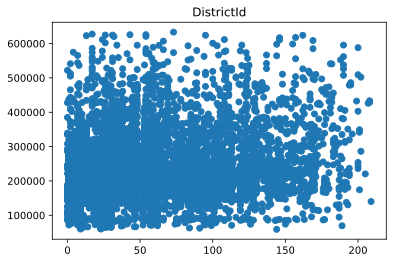

In [2629]:
plt.scatter(data['DistrictId'],data['Price'])
plt.title('DistrictId')
plt.show()

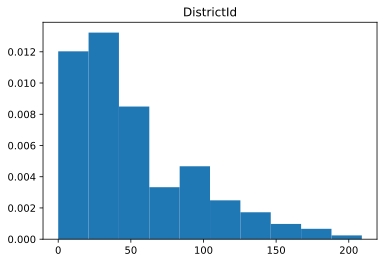

In [2630]:
plt.hist(data['DistrictId'],density = True)
plt.title('DistrictId')
plt.show()

Категориальные данные. 205 разных районов.75% всех районов имеют id от 0 до 75. Пропусков в данных нет. Пока ничего не будем с ними делать

#### 2. Rooms

In [2631]:
data['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

Посмотрим на квартиры с больше,чем 5-ю комнатами и с площадью, меньше,чем средняя площадь 5-комнатных.

In [2632]:
data.loc[(data['Rooms'] > 5) & (data['Square'] < (data.loc[data['Rooms'] ==5,'Square']).mean()),:]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
377    5927          57   10.0  59.056975   36.223072           10.0     22   
1454   8491           1   19.0  42.006046   21.779288            7.0     17   
2170  14003          99    6.0  59.414334   38.702244            6.0      7   
8849  14865           9   10.0  60.871266   38.420681           10.0      3   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
377         22.0       2002   0.090799         B         B        74   
1454        17.0       2014   0.007122         B         B         1   
2170         9.0       1969   0.033494         B         B        66   
8849         2.0       1994   0.161532         B         B        25   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
377      19083         2           NaN            5       15       B   
1454       264         0           NaN            0        1       B   
2170     10573         1        1322.0            3        8       B   
8849      5648         1          30.0            2        4       B   

              Price  
377   317265.323792  
1454   78364.616704  
2170  229661.964416  
8849  172329.270863

Похоже, что с этими квартирами что-то не то. Т.к. их немного, то не будем ничего пытаться исправить, а просто удалим их.

In [2633]:
data = data.drop([377,1454,2170,8849])

Посмотрим на квартиры со значением поля 'Rooms' равным 0.

In [2634]:
data.loc[data['Rooms'] == 0.0]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
1397  12638          27    0.0  138.427694  136.215499            0.0      4   
1981   7917          27    0.0  212.932361  211.231125            0.0      2   
2269   7317          27    0.0   41.790881         NaN            0.0     13   
3911    770          28    0.0   49.483501         NaN            0.0     16   
4366    456           6    0.0   81.491446         NaN            0.0      4   
4853   3224          27    0.0    2.377248    0.873147            0.0      1   
6149   3159          88    0.0   38.697117   19.345131            9.0      9   
8834   9443          27    0.0   87.762616   85.125471            0.0      5   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
1397         3.0       2016   0.075424         B         B        11   
1981         3.0       2008   0.211401         B         B         9   
2269         0.0       1977   0.211401         B         B         9   
3911         0.0       2015   0.118537         B         B        30   
4366         0.0       1977   0.243205         B         B         5   
4853         0.0       1977   0.017647         B         B         2   
6149        16.0       1982   0.127376         B         B        43   
8834        15.0       1977   0.211401         B         B         9   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
1397      3097         0           NaN            0        0       B   
1981      1892         0           NaN            0        1       B   
2269      1892         0           NaN            0        1       B   
3911      6207         1        1183.0            1        0       B   
4366      1564         0         540.0            0        0       B   
4853       469         0           NaN            0        0       B   
6149      8429         3           NaN            3        9       B   
8834      1892         0           NaN            0        1       B   

              Price  
1397  268394.744389  
1981  302211.260887  
2269   98129.976788  
3911  217009.338463  
4366  212864.799112  
4853  126596.941798  
6149  158998.110646  
8834  219281.918007

В этих данных тоже явно присутствуют ошибки. Площадь либо слишком большая, либо слишком маленькая. Нет площадей кухонь. Удалим

In [2635]:
data = data.drop([1397,1981,2269,3911,4366,4853,6149,8834])

In [2636]:
data.describe()

Id   DistrictId        Rooms       Square   LifeSquare  \
count   9988.000000  9988.000000  9988.000000  9988.000000  7878.000000   
mean    8384.648278    50.419003     1.888266    56.295899    37.167515   
std     4859.105242    43.598629     0.811534    20.984196    86.257886   
min        0.000000     0.000000     1.000000     1.136859     0.370619   
25%     4170.750000    20.000000     1.000000    41.773051    22.772654   
50%     8395.500000    36.000000     2.000000    52.509275    32.769898   
75%    12592.500000    75.000000     2.000000    65.894295    45.126159   
max    16798.000000   209.000000     5.000000   641.065193  7480.592129   

       KitchenSquare        Floor   HouseFloor     HouseYear    Ecology_1  \
count    9988.000000  9988.000000  9988.000000  9.988000e+03  9988.000000   
mean        6.276632     8.526632    12.615839  3.992567e+03     0.118849   
std        28.577525     5.239378     6.772128  2.006207e+05     0.119065   
min         0.000000     1.000000     0.000000  1.910000e+03     0.000000   
25%         1.000000     4.000000     9.000000  1.974000e+03     0.017647   
50%         6.000000     7.000000    13.000000  1.977000e+03     0.075424   
75%         9.000000    12.000000    17.000000  2.001000e+03     0.195781   
max      2014.000000    42.000000   117.000000  2.005201e+07     0.521867   

          Social_1      Social_2     Social_3  Healthcare_1  Helthcare_2  \
count  9988.000000   9988.000000  9988.000000   5198.000000  9988.000000   
mean     24.688226   5352.479375     8.048058   1143.192382     1.319684   
std      17.523467   4005.068683    23.844795   1021.756255     1.493427   
min       0.000000    168.000000     0.000000      0.000000     0.000000   
25%       6.000000   1564.000000     0.000000    350.000000     0.000000   
50%      25.000000   5285.000000     2.000000    900.000000     1.000000   
75%      36.000000   7227.000000     5.000000   1548.000000     2.000000   
max      74.000000  19083.000000   141.000000   4849.000000     6.000000   

           Shops_1          Price  
count  9988.000000    9988.000000  
mean      4.232379  214155.733452  
std       4.806454   92892.529960  
min       0.000000   59174.778028  
25%       1.000000  153872.633942  
50%       3.000000  192255.017896  
75%       6.000000  249135.462171  
max      23.000000  633233.466570

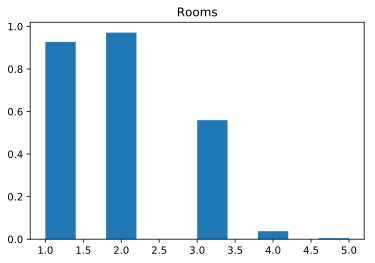

In [2637]:
plt.hist(data['Rooms'],density = True)
plt.title('Rooms')
plt.show()

Значения признака 'Rooms' от 1 до 5, пропуски в данных отсутствуют. 

#### 3. Square

Посмотрим на площади квартир < 15 метров, в которых жилая площадь тоже < 15 метров.

In [2638]:
data.loc[(data['Square'] < 15) & (data['LifeSquare'] < 15),:]

Id  DistrictId  Rooms    Square  LifeSquare  KitchenSquare  Floor  \
1316  11526          27    1.0  4.633498    1.969969            1.0     18   
1608  10202           6    1.0  2.596351    4.604943            1.0      3   
3413   9487           5    1.0  5.129222    5.549458            1.0      1   
4900   4504          27    3.0  4.390331    5.610772            1.0      8   
6392  14786           1    1.0  1.136859    4.525736            1.0      3   
8283  15744          34    1.0  1.988943    2.642219            1.0     21   
9294   6782          45    1.0  2.954309    5.257278            1.0      3   
9613   7657          38    1.0  4.502784    4.618547            1.0     28   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
1316         1.0       1977   0.011654         B         B         4   
1608        25.0       2014   0.243205         B         B         5   
3413         1.0       1977   0.150818         B         B        16   
4900        19.0       2016   0.211401         B         B         9   
6392         1.0       1977   0.007122         B         B         1   
8283         4.0       1977   0.069753         B         B        53   
9294         1.0       1977   0.195781         B         B        23   
9613         1.0       1977   0.060753         B         B        15   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
1316       915         0           NaN            0        0       B   
1608      1564         0         540.0            0        0       B   
3413      3433         4        2643.0            4        5       B   
4900      1892         0           NaN            0        1       B   
6392       264         0           NaN            0        1       B   
8283     13670         4           NaN            1       11       B   
9294      5212         6           NaN            3        2       B   
9613      2787         2         520.0            0        7       B   

              Price  
1316  107604.269441  
1608  137597.601458  
3413  369472.403061  
4900  161379.067034  
6392  181434.825589  
8283  458378.777006  
9294  438005.182323  
9613  483283.488083

Данные явно ошибочные. Удалим

In [2639]:
data = data.drop([1316,1608,3413,4900,6392,8283,9294,9613])

Посмотрим на данные в которых площадь < 15 , а жилая площадь > 15

In [2640]:
data.loc[(data['Square'] < 15) & (data['LifeSquare'] > 15),:]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
212    1748          88    2.0   5.497061   67.628717            1.0     24   
3280  10527          27    1.0   4.380726   40.805837            1.0     10   
4739  12676          81    3.0  13.784865   15.988889            7.0      4   
8030  13265           1    3.0   4.823679   79.767964            0.0      6   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
212         22.0       1977   0.127376         B         B        43   
3280        17.0       2013   0.211401         B         B         9   
4739         5.0       1960   0.319809         B         B        25   
8030        17.0       1977   0.007122         B         B         1   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
212       8429         3           NaN            3        9       B   
3280      1892         0           NaN            0        1       B   
4739      4756        16        2857.0            5        8       B   
8030       264         0           NaN            0        1       B   

              Price  
212   412511.088764  
3280   97560.720383  
4739   78388.806186  
8030  237716.681261

Заменим в этих данных значение поля 'Square', на соответствующее значение 'LifeSquare'

In [2641]:
data.loc[(data['Square'] < 15) & (data['LifeSquare'] > 15),'Square'] = data['LifeSquare']

Посмотрим на данные в которых площадь > 200 , а цена меньше среднего значения цены по всем квартирам

In [2642]:
data.loc[(data['Square'] > 200) & (data['Price'] < data['Price'].mean()),:]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
4262     28           9    2.0  604.705972         NaN            1.0     17   
4690   2307         102    1.0  409.425181  410.639749           10.0      4   
6977  11602          30    2.0  641.065193  638.163193           10.0     20   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
4262        18.0       1977   0.161532         B         B        25   
4690         4.0       2016   0.238617         B         B        26   
6977        19.0       2019   0.000078         B         B        22   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
4262      5648         1          30.0            2        4       B   
4690      3889         6         705.0            3        6       B   
6977      6398       141        1046.0            3       23       B   

              Price  
4262  187717.242538  
4690   90470.430830  
6977  133529.681562

Здесь тоже какие-то ошибки. Удалим.

In [2643]:
data = data.drop([4262,4690,6977])

In [2644]:
data.describe()

Id   DistrictId        Rooms       Square   LifeSquare  \
count   9977.000000  9977.000000  9977.000000  9977.000000  7868.000000   
mean    8384.408339    50.442117     1.888844    56.206938    37.077034   
std     4859.259093    43.607920     0.811513    18.998005    85.936795   
min        0.000000     0.000000     1.000000    15.988889     0.370619   
25%     4170.000000    20.000000     1.000000    41.784525    22.801235   
50%     8395.000000    36.000000     2.000000    52.536589    32.784366   
75%    12594.000000    75.000000     2.000000    65.904217    45.128052   
max    16798.000000   209.000000     5.000000   275.645284  7480.592129   

       KitchenSquare        Floor   HouseFloor     HouseYear    Ecology_1  \
count    9977.000000  9977.000000  9977.000000  9.977000e+03  9977.000000   
mean        6.280645     8.523404    12.620327  3.994773e+03     0.118845   
std        28.592788     5.232723     6.767814  2.007312e+05     0.119092   
min         0.000000     1.000000     0.000000  1.910000e+03     0.000000   
25%         1.000000     4.000000     9.000000  1.974000e+03     0.017647   
50%         6.000000     7.000000    13.000000  1.977000e+03     0.075424   
75%         9.000000    12.000000    17.000000  2.001000e+03     0.195781   
max      2014.000000    42.000000   117.000000  2.005201e+07     0.521867   

          Social_1      Social_2     Social_3  Healthcare_1  Helthcare_2  \
count  9977.000000   9977.000000  9977.000000   5192.000000  9977.000000   
mean     24.695500   5353.802947     8.040493   1143.457242     1.319535   
std      17.525674   4005.340587    23.819960   1021.927931     1.493414   
min       0.000000    168.000000     0.000000      0.000000     0.000000   
25%       6.000000   1564.000000     0.000000    350.000000     0.000000   
50%      25.000000   5285.000000     2.000000    900.000000     1.000000   
75%      36.000000   7227.000000     5.000000   1548.000000     2.000000   
max      74.000000  19083.000000   141.000000   4849.000000     6.000000   

           Shops_1          Price  
count  9977.000000    9977.000000  
mean      4.231031  214116.326827  
std       4.804190   92808.877624  
min       0.000000   59174.778028  
25%       1.000000  153893.979077  
50%       3.000000  192277.326489  
75%       6.000000  249114.537525  
max      23.000000  633233.466570

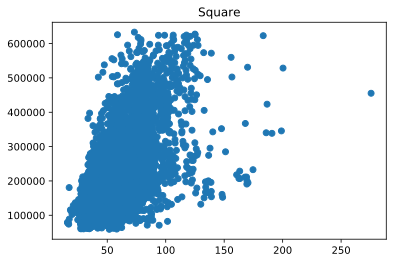

In [2645]:
plt.scatter(data['Square'],data['Price'])
plt.title('Square')
plt.show()

Посмотрим на квартиру с площадью > 250 

In [2646]:
data.loc[data['Square'] > 250,:]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
1982  5548          86    5.0  275.645284  233.949309           26.0     12   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
1982        37.0       2011   0.161976         B         A        31   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
1982      7010         5        4508.0            3        7       B   

              Price  
1982  455264.882666

In [2647]:
data = data.drop([1982])

По площадям все похоже на правду, цена тоже соответствует, поэтому оставим это значение. 

В итоге по полю 'Square' содержатся значения от 15,9 до 275 м, причем 75% квартир с площадью < 66 м. Похоже на правду. Пропуски в данных отстутствуют. 

#### 4.LifeSquare

Посмотрим на квартиры с жилой площадью < 15

In [2648]:
data.loc[data['LifeSquare'] < 15,:]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
26     4378          27    3.0  106.958871    0.641822            0.0     17   
95     4280          34    2.0   61.334968    4.091945            1.0     26   
134   12613           6    2.0   65.496674    5.589324            1.0      5   
158   16779          27    3.0   51.991064    4.896202            1.0     22   
160    3522           6    1.0   66.419841    3.987101            1.0      2   
219    5354          85    1.0   28.535084   12.733642            6.0      4   
270   15215          17    1.0   46.692974    5.941401            1.0      7   
279    8727           1    2.0   79.521221    4.634049            1.0      5   
363   15751           9    1.0   44.171793    1.251846            1.0     11   
475    6333          27    2.0   64.049695    4.008230            1.0      5   
477    8849          45    1.0   63.419553    2.286357            1.0      3   
527    2141          56    1.0   53.733677    4.323046            1.0     24   
560    8149           6    2.0   71.904226    4.171094            1.0      9   
655      34           6    3.0   78.380053    4.003157            1.0     23   
674   10631          88    1.0   42.571618    1.941521            1.0      6   
682    2913          34    4.0   94.888593    2.637095            1.0      4   
683   15091          27    2.0   66.535842    1.638083            1.0      6   
695    1867          30    1.0   54.626206    4.651397            1.0      4   
707    4345          62    1.0   49.275155    1.377284            1.0      5   
734    4319          62    1.0   51.815214    4.203073            1.0      6   
751   11989          62    3.0  104.446306    1.451067            1.0     12   
765    7060          27    1.0   38.651043    5.822657            1.0      7   
850    2470           6    1.0   43.312025    1.404493            1.0     11   
882    1250          53    2.0   56.290825    5.142822            1.0      2   
1169  14866           6    1.0   38.818170    5.927865            1.0     18   
1175   3527           9    1.0   72.035396    2.358992            1.0      5   
1214   6366           6    1.0   47.804946    2.553024            1.0      6   
1215   6189          53    2.0   58.896686    5.735331            1.0     18   
1410   1843          74    1.0   49.635712    3.411048            1.0      4   
1504   2967           1    1.0   62.494611    3.489694            0.0      1   
...     ...         ...    ...         ...         ...            ...    ...   
8778   1530         145    1.0   39.726251   14.462872           11.0      2   
8855   4512           9    2.0   64.977910    5.768457            1.0     11   
8882  14112          23    2.0   53.043172    4.855507            1.0      4   
8886   2056           9    1.0   47.301790    5.125908            1.0      7   
8906   4682           7    2.0   43.860149   11.321071            7.0      6   
8908  10684          22    1.0   41.872590    2.347250            1.0      3   
8971   6749          23    2.0   65.204976    2.467002            0.0      9   
8973  14254          27    2.0   73.275697    2.861966            1.0      2   
9033   2915          29    1.0   23.891837   13.949307            3.0      5   
9177  13951          45    1.0   39.225914    2.372105            1.0     24   
9192   1754           6    1.0   61.978423    3.943299            1.0      1   
9264   5458           9    2.0   62.920673    1.591420            1.0      7   
9291  15165          74    2.0   83.259565    5.387263            1.0     12   
9298  11784          55    1.0   35.933565   14.620211            9.0      1   
9299   8687          48    1.0   42.840915    2.608669            1.0     19   
9316  15449           6    2.0   62.548496    3.645893            1.0     16   
9339  14002         161    1.0   52.330122   14.691433           12.0     10   
9396   3745          30    1.0   42.457169    3.259832            1.0     10   
9412  132

Получилось 238 записей, в которых данные о жилой площади явно ошибочны. Заменим эти данные на значение поля 'Square', умноженного на понижающий коэффициент

In [2649]:
data.loc[data['LifeSquare'] < 15,'LifeSquare'] = data['Square']*\
                                                             (data['LifeSquare'].mean()/data['Square'].mean())

Проверим

In [2650]:
data.loc[data['LifeSquare'] < 15,:]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
1891  13685           0    1.0  17.498542   11.539678            0.0      7   
3084   3732         112    1.0  20.213128   13.329853            3.0      5   
4118    828          90    1.0  20.924926   13.799259            3.0      7   
4364   9905          41    1.0  22.691542   14.964280            3.0      7   
6054   6351         111    1.0  20.606762   13.589441            0.0      4   
6993  14642          90    1.0  22.682706   14.958453            3.0      5   
7767   6927          21    1.0  16.117154   10.628701            0.0      2   
7897  10635          21    1.0  18.983962   12.519261            2.0      1   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
1891         5.0       1961   0.319809         B         B        25   
3084         9.0       1974   0.069660         B         B        31   
4118         5.0       1968   0.265089         B         B        37   
4364         9.0       1972   0.175055         B         B        36   
6054        15.0       1975   0.135650         B         B        46   
6993         5.0       1969   0.265089         B         B        37   
7767         5.0       1965   0.194489         B         B        47   
7897         5.0       1967   0.194489         B         B        47   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
1891      4756        16        2857.0            5        8       B   
3084      6119         4           NaN            1        2       B   
4118      5288         0        1937.0            3        2       B   
4364     10055         3           NaN            1        0       B   
6054      7960         6         350.0            3       11       B   
6993      5288         0        1937.0            3        2       B   
7767      8004         3         125.0            3        5       B   
7897      8004         3         125.0            3        5       B   

              Price  
1891   88871.750230  
3084  113050.229914  
4118  128808.087357  
4364  136682.956950  
6054  108379.889782  
6993  118004.829969  
7767   79913.267856  
7897  112411.221700

Значение очень маленькие, но возможно, такие квартиры существуют. Оставим.

Проверим есть ли квартиры с жилой площадью, больше,чем вся площадь.

In [2651]:
data.loc[data['LifeSquare'] > 275]

Id  DistrictId  Rooms     Square   LifeSquare  KitchenSquare  Floor  \
4328  16550          27    3.0  81.694417  7480.592129            1.0      9   
8437  15886          85    3.0  78.059331   461.463614           10.0     12   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
4328        17.0       2016   0.017647         B         B         2   
8437        16.0       1998   0.037178         B         B        52   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
4328       469         0           NaN            0        0       B   
8437     11217         1        2300.0            1        7       B   

              Price  
4328  217357.492366  
8437  394253.299978

Тоже заменим эти значения на значение всей площади с понижающим коэффициентом.

In [2652]:
data.loc[data['LifeSquare'] > 275,'LifeSquare'] = data['Square']*\
                                                             (data['LifeSquare'].mean()/data['Square'].mean())

Проверим есть ли квартиры, в которых жилая площадь больше, чем общая площадь.

In [2653]:
data.loc[data['LifeSquare'] > data['Square'],:]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
28     8054          23    1.0   42.530043   43.967759            1.0      3   
44    10521          38    3.0  104.211396  106.340403            0.0     20   
52     2301           1    2.0   61.400054   65.224603            0.0     17   
123    8753          25    3.0   85.952306   89.803753            1.0      4   
153    9870          62    1.0   51.831473   53.491301            1.0      5   
178    2416          57    1.0   29.298168   29.770784            5.0      7   
184    3398          74    1.0   48.743665   51.011232            1.0     12   
217    5540          27    3.0   57.643613   59.425078            9.0     16   
234   12633          27    3.0   81.867166   81.884548            0.0     12   
236    3916           1    1.0   43.084413   47.071617            1.0      9   
237    3851          52    2.0   65.388475   66.591815            1.0     13   
271    7674          30    2.0   51.283020   51.575295            1.0      5   
315   14899          27    1.0   37.370830   39.184607            1.0     25   
342    7815           6    1.0   74.609609   78.533293            1.0     16   
343     716         113    3.0  125.287183  127.477137           19.0     26   
358    6006          62    3.0  121.844004  122.497641            1.0      3   
369      61           1    1.0   54.307727   55.926217            1.0      4   
378   15443           1    1.0   37.885188   40.313322           10.0     12   
379    8104          52    1.0   37.496336   38.964704           10.0      7   
392   15246           1    2.0   64.067854   65.081193            1.0     12   
401    2123          58    3.0   93.905616   94.958481            1.0      3   
478   10391          62    1.0   37.498161   40.371530            1.0     21   
495   10071          27    2.0   34.665783   36.079447            9.0      3   
498   12796           6    1.0   59.816412   60.823136            1.0     24   
506    9552          23    1.0  105.432181  106.178175            0.0      3   
544    2467          23    3.0   63.837671   64.300575            1.0      4   
554    5738          52    2.0   66.795666   67.051654            1.0      3   
561   11692         113    2.0   70.566571   70.694221           12.0     28   
574   14211          48    1.0   39.357596   40.015989            1.0     21   
590   14990          23    2.0   48.449873  263.542020            5.0      6   
...     ...         ...    ...         ...         ...            ...    ...   
9469   3992           1    3.0   87.200625   87.730225            0.0     21   
9476  13789          23    1.0   29.289544   30.492156            0.0      3   
9484  10374          54    2.0   78.061116   82.171479            1.0     10   
9492   5367           1    3.0   81.227389   81.655818            0.0     14   
9582   3414           6    2.0   60.913076   63.262528            1.0      3   
9584   8403           9    2.0   56.690554   56.917296            1.0      8   
9589  16638          38    1.0  106.260300  109.246660            1.0      4   
9594   7113          62    1.0   43.906426   44.082779            1.0     13   
9595   7249           6    3.0   73.171947   74.858927            1.0      7   
9597    833          27    1.0   44.260288   45.602761           10.0      3   
9626   3742           1    1.0   53.258610   56.655126            0.0      6   
9630  10021          27    1.0   41.755282   41.857484            1.0     13   
9646   6996          23    2.0   53.054415   54.677693            1.0      3   
9681     47           2    2.0   45.053898   47.329346            5.0      2   
9707  12302          30    1.0   46.072913   48.307844            0.0      4   
9721    396          54    3.0  110.119100  110.333763            1.0      8   
9742   9941          46    3.0   64.642890   66.400030            6.0      6   
9772   6968           6    3.0   74.505045   75.735479            1.0     15   
9793   57

Нашлось 468 записей. Тоже заменим эти данные на значение общей площади, умноженной на коэффициент

In [2654]:
data.loc[data['LifeSquare'] > data['Square'],'LifeSquare'] = data['Square']*\
                                                             (data['LifeSquare'].mean()/data['Square'].mean())

In [2655]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9976 entries, 0 to 9999
Data columns (total 20 columns):
Id               9976 non-null int64
DistrictId       9976 non-null int64
Rooms            9976 non-null float64
Square           9976 non-null float64
LifeSquare       7867 non-null float64
KitchenSquare    9976 non-null float64
Floor            9976 non-null int64
HouseFloor       9976 non-null float64
HouseYear        9976 non-null int64
Ecology_1        9976 non-null float64
Ecology_2        9976 non-null object
Ecology_3        9976 non-null object
Social_1         9976 non-null int64
Social_2         9976 non-null int64
Social_3         9976 non-null int64
Healthcare_1     5191 non-null float64
Helthcare_2      9976 non-null int64
Shops_1          9976 non-null int64
Shops_2          9976 non-null object
Price            9976 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.9+ MB


В поле 'Lifesquare' есть отсутствующие значения. Заполним их по тому же принципу.

In [2656]:
data['LifeSquare'].fillna(data['Square']*\
                          (data['LifeSquare'].mean()/data['Square'].mean()),inplace = True)

In [2657]:
data.describe()

Id   DistrictId        Rooms       Square   LifeSquare  \
count   9976.000000  9976.000000  9976.000000  9976.000000  9976.000000   
mean    8384.692662    50.438553     1.888532    56.184941    36.179682   
std     4859.419664    43.608652     0.810956    18.871473    14.570754   
min        0.000000     0.000000     1.000000    15.988889    10.628701   
25%     4169.500000    20.000000     1.000000    41.784346    25.125151   
50%     8395.500000    36.000000     2.000000    52.535436    33.223225   
75%    12594.250000    75.000000     2.000000    65.900625    44.180616   
max    16798.000000   209.000000     5.000000   200.334539   161.504222   

       KitchenSquare        Floor   HouseFloor     HouseYear    Ecology_1  \
count    9976.000000  9976.000000  9976.000000  9.976000e+03  9976.000000   
mean        6.278669     8.523055    12.617883  3.994972e+03     0.118841   
std        28.593540     5.232870     6.763750  2.007413e+05     0.119097   
min         0.000000     1.000000     0.000000  1.910000e+03     0.000000   
25%         1.000000     4.000000     9.000000  1.974000e+03     0.017647   
50%         6.000000     7.000000    13.000000  1.977000e+03     0.075424   
75%         9.000000    12.000000    17.000000  2.001000e+03     0.195781   
max      2014.000000    42.000000   117.000000  2.005201e+07     0.521867   

          Social_1      Social_2     Social_3  Healthcare_1  Helthcare_2  \
count  9976.000000   9976.000000  9976.000000   5191.000000  9976.000000   
mean     24.694868   5353.636929     8.040798   1142.809093     1.319366   
std      17.526439   4005.507022    23.821135   1020.958545     1.493394   
min       0.000000    168.000000     0.000000      0.000000     0.000000   
25%       6.000000   1564.000000     0.000000    350.000000     0.000000   
50%      25.000000   5285.000000     2.000000    900.000000     1.000000   
75%      36.000000   7227.000000     5.000000   1548.000000     2.000000   
max      74.000000  19083.000000   141.000000   4849.000000     6.000000   

           Shops_1          Price  
count  9976.000000    9976.000000  
mean      4.230754  214092.153956  
std       4.804351   92782.114935  
min       0.000000   59174.778028  
25%       1.000000  153891.653482  
50%       3.000000  192269.644879  
75%       6.000000  249100.769116  
max      23.000000  633233.466570

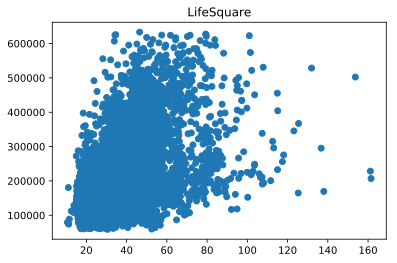

In [2658]:
plt.scatter(data['LifeSquare'],data['Price'])
plt.title('LifeSquare')
plt.show()

Посмотрим на квартиру с жилой площадью  > 200

In [2659]:
data.loc[data['LifeSquare'] > 200,:]

Empty DataFrame
Columns: [Id, DistrictId, Rooms, Square, LifeSquare, KitchenSquare, Floor, HouseFloor, HouseYear, Ecology_1, Ecology_2, Ecology_3, Social_1, Social_2, Social_3, Healthcare_1, Helthcare_2, Shops_1, Shops_2, Price]
Index: []

Эта та самая 5-комнатная квартира, которую мы оставили при анализе общей площади.

В итоге по полю 'LifeSquare' содержатся значения от 10,8 до 233 м, причем 75% квартир с площадью < 45 м. Похоже на правду. Пропуски в данных отстутствуют.

#### 5. KitchenSquare

In [2660]:
data.describe()

Id   DistrictId        Rooms       Square   LifeSquare  \
count   9976.000000  9976.000000  9976.000000  9976.000000  9976.000000   
mean    8384.692662    50.438553     1.888532    56.184941    36.179682   
std     4859.419664    43.608652     0.810956    18.871473    14.570754   
min        0.000000     0.000000     1.000000    15.988889    10.628701   
25%     4169.500000    20.000000     1.000000    41.784346    25.125151   
50%     8395.500000    36.000000     2.000000    52.535436    33.223225   
75%    12594.250000    75.000000     2.000000    65.900625    44.180616   
max    16798.000000   209.000000     5.000000   200.334539   161.504222   

       KitchenSquare        Floor   HouseFloor     HouseYear    Ecology_1  \
count    9976.000000  9976.000000  9976.000000  9.976000e+03  9976.000000   
mean        6.278669     8.523055    12.617883  3.994972e+03     0.118841   
std        28.593540     5.232870     6.763750  2.007413e+05     0.119097   
min         0.000000     1.000000     0.000000  1.910000e+03     0.000000   
25%         1.000000     4.000000     9.000000  1.974000e+03     0.017647   
50%         6.000000     7.000000    13.000000  1.977000e+03     0.075424   
75%         9.000000    12.000000    17.000000  2.001000e+03     0.195781   
max      2014.000000    42.000000   117.000000  2.005201e+07     0.521867   

          Social_1      Social_2     Social_3  Healthcare_1  Helthcare_2  \
count  9976.000000   9976.000000  9976.000000   5191.000000  9976.000000   
mean     24.694868   5353.636929     8.040798   1142.809093     1.319366   
std      17.526439   4005.507022    23.821135   1020.958545     1.493394   
min       0.000000    168.000000     0.000000      0.000000     0.000000   
25%       6.000000   1564.000000     0.000000    350.000000     0.000000   
50%      25.000000   5285.000000     2.000000    900.000000     1.000000   
75%      36.000000   7227.000000     5.000000   1548.000000     2.000000   
max      74.000000  19083.000000   141.000000   4849.000000     6.000000   

           Shops_1          Price  
count  9976.000000    9976.000000  
mean      4.230754  214092.153956  
std       4.804351   92782.114935  
min       0.000000   59174.778028  
25%       1.000000  153891.653482  
50%       3.000000  192269.644879  
75%       6.000000  249100.769116  
max      23.000000  633233.466570

Судя по максимальному значению, есть какой-то выброс. Посмотрим на него.

In [2661]:
data.loc[data['KitchenSquare'] > 233,:]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
1064  14656          62    1.0  47.100719   46.447960         2014.0      4   
8584  14679          81    1.0  32.276663   19.278394         1970.0      6   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
1064         1.0       2014   0.072158         B         B         2   
8584         1.0       1977   0.006076         B         B        30   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
1064       629         1           NaN            0        0       A   
8584      5285         0         645.0            6        6       B   

              Price  
1064  108337.484207  
8584  105539.556275

Заменим на медиану.

In [2662]:
data.loc[data['KitchenSquare'] > 233,'KitchenSquare'] = data['KitchenSquare'].median()

Посмотрим на значения большие,чем жилая площадь

In [2663]:
data.loc[data['KitchenSquare'] > data['LifeSquare'],:]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
227   16395           2    3.0   79.722243   44.731219           72.0     12   
551    1315           6    1.0   48.128114   45.023531           48.0     21   
1369   2371          27    2.0   68.841073   64.234956           66.0      4   
1860   4265         161    2.0   53.216778   32.644859           53.0      7   
2916  12390          72    3.0   97.490674   64.196932           96.0     22   
3379  16781          27    1.0   36.138409   23.796891           36.0     19   
4079   6508          23    2.0   67.146049   33.959154           63.0      5   
4142  15466          88    1.0   42.357487   27.892111           41.0     10   
4588    448          48    1.0   41.186904   27.161326           41.0      2   
5149  13703          42    1.0   38.071692   19.723548           73.0      9   
5480  15781          10    1.0   35.813564   19.953992           35.0      6   
5653   8500          31    1.0   80.606246   25.299592           29.0      6   
5849  11624          46    1.0   42.983283   24.224435           37.0     15   
5888  16593          52    2.0   64.859242   41.159314           62.0     15   
6036  12666          34    2.0   60.603363   39.965804           58.0     14   
6240   4966          96    3.0   78.445675   47.146757           75.0      9   
7088   6569          27    1.0   38.220258   18.716856           84.0      4   
8232   7162          34    2.0   56.738764   37.362082           54.0     26   
9111   6708          48    1.0   42.069359   22.487739           39.0      1   
9317  13288         161    1.0   50.808925   15.920343           20.0      8   
9889  12918          23    2.0   51.440463   33.873188           51.0      3   
9895   2737          27    3.0  123.430072   81.277845          123.0      5   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
227         16.0       1987   0.130618         B         B        39   
551          1.0       2013   0.243205         B         B         5   
1369         2.0       2014   0.017647         B         B         2   
1860        17.0       1994   0.000699         B         B        14   
2916        25.0       2019   0.210473         B         B        11   
3379        19.0       2017   0.072158         B         B         2   
4079        17.0       2019   0.034656         B         B         0   
4142        19.0       2016   0.127376         B         B        43   
4588         1.0       1977   0.041125         B         B        46   
5149        10.0       2006   0.158249         B         B        21   
5480        14.0       1971   0.282798         B         B        33   
5653        40.0       2014   0.151346         B         A        32   
5849        16.0       1983   0.188784         B         B        31   
5888        17.0       1977   0.371149         B         B        34   
6036        22.0       1977   0.069753         B         B        53   
6240        12.0       1977   0.041116         B         B        53   
7088        17.0       2018   0.011654         B         B         4   
8232        25.0       2016   0.069753         B         B        53   
9111        10.0       2010   0.041125         B         B        46   
9317         9.0       1910   0.014423         B         B        19   
9889        17.0       2017   0.005767         B         B         1   
9895        10.0       2015   0.017647         B         B         2   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
227      10418         9         900.0            1        9       B   
551       1564         0         540.0            0        0       B   
1369       469         0           NaN            0        0       B   
1860      3369        24        4129.0            0        3       B   
2916      2398         2        1994.0            3        0       B   
3379       629         1           NaN            0        0       A   
4079   

Заменим на медианное значение.

In [2664]:
data.loc[data['KitchenSquare'] > data['LifeSquare'],'KitchenSquare'] = data['KitchenSquare'].median()

Посмотрим на подозрительно маленькие значения

In [2665]:
data.loc[data['KitchenSquare'] < 2,:]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
2      4765          53    2.0   44.947953   29.197612            0.0      8   
7     11993          74    2.0   80.312926   50.966136            0.0     14   
8      5172           1    2.0   64.511437   40.938599            1.0      9   
12     6452          13    2.0   54.522805   31.759753            1.0      8   
14    10953          27    1.0   53.769097   52.408027            1.0      5   
21    11935          27    2.0   64.711835   41.065770            1.0     15   
23     6641          54    3.0  118.907612   75.458109            0.0      2   
25     5073          74    2.0   82.667915   52.460599            1.0     16   
26     4378          27    3.0  106.958871   70.535644            0.0     17   
27     7550          23    2.0   64.556209   40.967011            1.0      8   
28     8054          23    1.0   42.530043   28.005738            1.0      3   
32    13253          27    2.0   63.679116   37.275775            1.0      9   
36    11703          23    1.0   41.118766   26.093740            1.0      4   
39     9371          23    2.0   60.503248   38.395025            0.0     16   
42     9833           1    2.0   56.494318   54.723569            0.0      9   
43      175          23    2.0   58.692133   37.245701            1.0     16   
44    10521          38    3.0  104.211396   68.622480            0.0     20   
46     1821          23    2.0   49.929489   31.684976            1.0      9   
52     2301           1    2.0   61.400054   40.431509            0.0     17   
54    16334           1    1.0   42.414176   26.915800            1.0     14   
57     3203          23    2.0   56.218702   35.676075            1.0      3   
61     4191           1    2.0   65.023899   41.263804            1.0     10   
63     7605           6    1.0   42.505532   26.973774            1.0      6   
64     9723          52    2.0   64.141152   40.703618            1.0      5   
65    11398          62    1.0   41.194188   26.141603            0.0      6   
70    10362          27    2.0   79.227049   50.277044            0.0      9   
71     2136          74    2.0   84.687732   81.905552            0.0     12   
72    14675          74    1.0   52.457589   52.423345            0.0     18   
74     4014           6    2.0   63.184422   61.142894            1.0     17   
76    14020          34    1.0   47.909327   42.782385            1.0      2   
...     ...         ...    ...         ...         ...            ...    ...   
9914  11428           1    2.0   69.407574   44.045660            1.0     15   
9917   1901          94    1.0   45.822669   29.078811            1.0      7   
9923  16273          30    2.0   63.905356   40.553983            1.0      6   
9926  10680           1    1.0   41.657661   26.435720            1.0      2   
9931  13355          27    2.0   64.261856   40.780216            1.0     10   
9936  15173          30    2.0   62.341347   39.561472            1.0     19   
9938  15868           9    2.0   64.412326   61.337938            1.0     13   
9942   9369           1    2.0   56.323990   35.742891            1.0     18   
9944  16160          27    2.0   60.396765   38.327451            0.0     10   
9946   4470          62    3.0   89.915337   57.059772            0.0     13   
9948   8438           1    2.0   66.736039   42.350319            0.0     16   
9949   3355          53    1.0   39.211416   36.159431            1.0     19   
9951   9237          25    1.0   33.516313   31.086243            1.0     13   
9953   5365           1    2.0   61.049491   38.741667            0.0     11   
9954    583          27    3.0   84.250710   55.560404            1.0     15   
9960   9307           1    2.0   57.376642   36.410898            0.0      8   
9961   1579          23    1.0   27.331108   17.344169            1.0     10   
9963  15035           1    2.0   66.547650   42.230768            1.0     13   
9964  104

Похоже,что эти данные заполнялись явно не корректно. Заменим на медианное значение.

In [2666]:
data.loc[data['KitchenSquare'] < 3,'KitchenSquare']= data['KitchenSquare'].median()

Посмотрим на очень большие значения 

In [2667]:
data.loc[data['KitchenSquare'] > 20 , :]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
622   12924          30    3.0   92.473796   53.649526           22.0      3   
1077   9690          27    1.0   40.081042   37.834964           37.0     18   
1455  12507          54    2.0   79.810535   79.578961           78.0     10   
1804  11459          79    1.0   98.727990   49.781722           22.0     18   
1867   3267          58    3.0  138.980817  138.004600           43.0      2   
2656  14556         183    4.0  151.150660   98.187482           23.0      6   
2969   7441          62    3.0  114.734473  112.589083          112.0      3   
3368   6674          54    1.0  168.086347  125.486563           30.0     18   
3431   7111          27    2.0  139.070296   89.787666           42.0      5   
4110    299          27    2.0   66.787523   64.616662           60.0     14   
4651  12552          58    3.0  116.405693  113.109653          112.0      3   
5087  15947         129    4.0  185.906396   84.830074           31.0      5   
5162  11739          27    2.0   61.070298   59.845092           58.0      8   
5494    300          31    2.0  106.427686   34.230415           32.0      4   
5816   2271          27    1.0   43.292516   42.835643           40.0     12   
5904    673          27    1.0   54.418214   51.498581           51.0     10   
6988   8685          62    5.0  124.933289   81.122369           30.0      5   
7201   3233         129    4.0  186.692602   87.487080           32.0      3   
7249   3431          62    2.0   60.715426   40.720961           25.0      5   
7480  10546          62    1.0   46.013187   43.417043           43.0      4   
8182  16511          52    3.0  135.731888   71.583248           21.0     26   
8390  13559          79    1.0   96.838013   49.140960           22.0     19   
8921  12074          94    3.0  108.957285   51.063721           27.0      2   
9910  16568          27    4.0  200.334539  131.918903           25.0      1   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
622          2.0       2018   0.000078         B         B        22   
1077        19.0       2019   0.211401         B         B         9   
1455        15.0       2014   0.006076         B         B        30   
1804        24.0       2019   0.050756         B         B        24   
1867         2.0       1977   0.437885         B         B        23   
2656         7.0       1912   0.037316         B         B        32   
2969         3.0       2015   0.072158         B         B         2   
3368        28.0       2011   0.006076         B         B        30   
3431         3.0       2016   0.014073         B         B         2   
4110        20.0       2015   0.017647         B         B         2   
4651         3.0       2016   0.437885         B         B        23   
5087         3.0       2015   0.020741         B         B        24   
5162        17.0       2016   0.072158         B         B         2   
5494        40.0       2013   0.151346         B         A        32   
5816        11.0       2015   0.211401         B         B         9   
5904        17.0       2017   0.072158         B         B         2   
6988         3.0       2017   0.072158         B         B         2   
7201         3.0       2011   0.020741         B         B        24   
7249        12.0       2012   0.386772         B         B         5   
7480        17.0       2019   0.072158         B         B         2   
8182        25.0       2008   0.371149         B         B        34   
8390        24.0       2016   0.050756         B         B        24   
8921        22.0       2008   0.282798         B         B        33   
9910         2.0       2013   0.041116         B         B        53   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
622       6398       141        1046.0            3       23       B   
1077      1892         0           NaN            0        1   

Похоже,что данные внесены не верно. Заменим. 

In [2668]:
data.loc[data['KitchenSquare'] > 20,'KitchenSquare']= data['Square']*\
                                                        (data['KitchenSquare'].median()/data['Square'].median())

In [2669]:
data.describe()

Id   DistrictId        Rooms       Square   LifeSquare  \
count   9976.000000  9976.000000  9976.000000  9976.000000  9976.000000   
mean    8384.692662    50.438553     1.888532    56.184941    36.179682   
std     4859.419664    43.608652     0.810956    18.871473    14.570754   
min        0.000000     0.000000     1.000000    15.988889    10.628701   
25%     4169.500000    20.000000     1.000000    41.784346    25.125151   
50%     8395.500000    36.000000     2.000000    52.535436    33.223225   
75%    12594.250000    75.000000     2.000000    65.900625    44.180616   
max    16798.000000   209.000000     5.000000   200.334539   161.504222   

       KitchenSquare        Floor   HouseFloor     HouseYear    Ecology_1  \
count    9976.000000  9976.000000  9976.000000  9.976000e+03  9976.000000   
mean        7.340814     8.523055    12.617883  3.994972e+03     0.118841   
std         2.193316     5.232870     6.763750  2.007413e+05     0.119097   
min         3.000000     1.000000     0.000000  1.910000e+03     0.000000   
25%         6.000000     4.000000     9.000000  1.974000e+03     0.017647   
50%         6.000000     7.000000    13.000000  1.977000e+03     0.075424   
75%         9.000000    12.000000    17.000000  2.001000e+03     0.195781   
max        22.879933    42.000000   117.000000  2.005201e+07     0.521867   

          Social_1      Social_2     Social_3  Healthcare_1  Helthcare_2  \
count  9976.000000   9976.000000  9976.000000   5191.000000  9976.000000   
mean     24.694868   5353.636929     8.040798   1142.809093     1.319366   
std      17.526439   4005.507022    23.821135   1020.958545     1.493394   
min       0.000000    168.000000     0.000000      0.000000     0.000000   
25%       6.000000   1564.000000     0.000000    350.000000     0.000000   
50%      25.000000   5285.000000     2.000000    900.000000     1.000000   
75%      36.000000   7227.000000     5.000000   1548.000000     2.000000   
max      74.000000  19083.000000   141.000000   4849.000000     6.000000   

           Shops_1          Price  
count  9976.000000    9976.000000  
mean      4.230754  214092.153956  
std       4.804351   92782.114935  
min       0.000000   59174.778028  
25%       1.000000  153891.653482  
50%       3.000000  192269.644879  
75%       6.000000  249100.769116  
max      23.000000  633233.466570

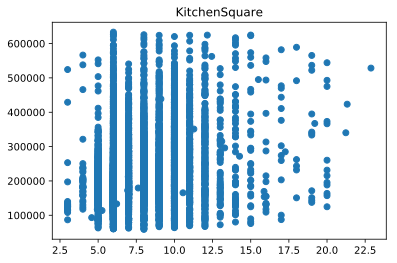

In [2670]:
plt.scatter(data['KitchenSquare'],data['Price'])
plt.title('KitchenSquare')
plt.show()

В итоге по полю 'KitchenSquare' содержатся значения от 2 до 43 м, причем 75% квартир с площадью < 12 м. Похоже на правду. Пропуски в данных отстутствуют.

#### 6. HouseFloor

Посмотрим есть ли 0 значения.

In [2671]:
data.loc[data['HouseFloor'] == 0,:]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
7     11993          74    2.0   80.312926   50.966136            6.0     14   
23     6641          54    3.0  118.907612   75.458109            6.0      2   
26     4378          27    3.0  106.958871   70.535644            6.0     17   
39     9371          23    2.0   60.503248   38.395025            6.0     16   
44    10521          38    3.0  104.211396   68.622480            6.0     20   
65    11398          62    1.0   41.194188   26.141603            6.0      6   
70    10362          27    2.0   79.227049   50.277044            6.0      9   
195    4645          54    2.0   76.312851   48.427710            6.0     14   
223    4622          27    2.0   62.153994   36.094352            6.0      5   
252    8139          27    2.0   58.553809   37.157921            6.0      7   
444    6224          59    3.0  106.349245   67.488639            6.0      7   
501   15923          27    1.0   26.553188   16.850506            6.0     25   
556    8610          35    1.0   47.410775   30.086614            6.0      4   
562    6916          27    1.0   43.011789   22.158763            6.0     17   
594    8093          45    2.0   62.933064   39.936972            6.0     18   
667    9684          88    3.0   86.431890   54.849196            6.0     11   
700   11548          27    2.0   41.610104   26.405540            6.0      7   
730   12947          53    2.0   56.023342   35.552101            6.0     14   
805   15931           1    2.0   77.330279   49.073365            6.0      1   
823    1498          45    3.0   83.515103   52.998219            6.0     11   
839    9925          62    1.0   42.805164   27.163919            6.0     14   
847   11828          27    1.0   52.539365   33.341189            6.0     11   
861   15131          27    2.0   60.299356   38.265636            6.0      5   
889    3429          27    1.0   47.020680   29.839062            6.0      8   
896    6036          95    1.0   46.248238   29.348874            6.0      5   
900    8940          34    1.0   26.811587   17.014484            6.0     18   
924   11875           6    2.0   65.070052   41.293093            6.0     11   
929    1827          27    1.0   38.037790   24.138570            6.0      7   
932    9383          24    2.0   88.407297   56.102778            6.0      2   
942    4711           6    1.0   41.224118   26.160596            6.0      8   
...     ...         ...    ...         ...         ...            ...    ...   
8888    184          23    1.0   56.786709   36.036530            6.0      3   
8893  11090           1    1.0   41.197082   40.808976            6.0     12   
8930  11532          23    2.0   55.550541   36.579646            6.0      7   
8954   6581          62    2.0   65.131558   41.332124            6.0     11   
8979  13670          22    1.0   87.485627   55.517892            6.0     16   
8996  15661          45    3.0   81.094922   51.462386            6.0     15   
9014   4405          74    2.0   71.207458   45.187856            6.0      5   
9030   8329          62    3.0   86.443771   54.856736            6.0      3   
9057  14564          34    4.0   97.524848   97.046136            6.0     20   
9087   7767           1    2.0   90.856881   57.657271            6.0     11   
9092  13884          45    2.0   62.460577   39.637135            6.0      5   
9122   9150           6    1.0   43.067590   27.330453            6.0     18   
9199   8755          62    2.0   79.329878   50.342299            6.0     17   
9219   1737          23    1.0   59.963701   38.052631            6.0      9   
9268  13665          62    2.0   57.717659   36.627305            6.0     10   
9312  12761          27    1.0   37.667044   15.894112            8.0      9   
9359    842          74    1.0   52.133425   33.083582            6.0     18   
9395  16371          62    3.0   88.961872   56.454709            6.0     10   
9432    3

Заменим эти значения на значения 'Floor' 

In [2672]:
data.loc[data['HouseFloor'] == 0,'HouseFloor'] = data['Floor']

Посмотрим на подозрительно большие значения

In [2673]:
data.loc[data['HouseFloor'] > 30,:]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
339   11563           8    1.0   50.390862   41.642898        6.00000     32   
359   15722          31    2.0   82.435495   48.655394       16.00000     23   
540    5279          93    2.0   60.804544   30.923827       11.00000      5   
1956  15157          54    1.0  106.239622   83.296167       17.00000     26   
2781   1674          76    2.0   74.344672   41.044132        5.00000     42   
3330   3298          31    1.0   57.551691   21.551876       10.00000     32   
3662   1102          54    3.0  101.279843   52.188698       20.00000     20   
3974   6502          20    1.0  126.389517  103.637322       14.00000     22   
4323   6589          30    1.0   62.110823   52.812128        4.00000     31   
4481   7789         146    1.0   60.890931   45.768512       11.00000     13   
4525  14773          30    1.0  105.619549   87.387096        5.00000     14   
5270   6327         146    3.0   75.037085   45.811037        9.00000     11   
5452  11625          84    1.0  102.640234   78.746443       19.00000     26   
5494    300          31    2.0  106.427686   34.230415       12.15496      4   
5653   8500          31    1.0   80.606246   25.299592        6.00000      6   
6131  10806           5    1.0   51.944587   48.709601        6.00000      6   
6459   3302          30    2.0  104.511894   86.460171        6.00000     25   
6755   8296         146    1.0   86.386754   71.904999        6.00000     37   
7728   7453          24    3.0  126.621358   62.455481       12.00000     22   
8060   7763          29    2.0   74.478408   39.382330       11.00000      3   
8340  15270          31    2.0   81.042938   46.633001       16.00000     15   
8357   8016          31    1.0   59.519896   24.050533       10.00000     33   
8599   9300          74    2.0   71.747869   47.245474        9.00000      5   
8763  12642           8    1.0   49.235302   43.066600        6.00000     14   
8824   7496          30    1.0  117.370746  102.187199        6.00000     14   
8854     78          30    2.0   65.773749   43.311557        6.00000      8   
9332   8510           7    2.0   82.390292   40.316798       16.00000      2   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
339         32.0       2008   0.092291         B         B        21   
359         40.0       2013   0.151346         B         A        32   
540         45.0       2016   0.050900         B         B        43   
1956        37.0       2009   0.006076         B         B        30   
2781        48.0       2016   0.000000         B         B         7   
3330        40.0       1977   0.151346         B         A        32   
3662        37.0       2014   0.006076         B         B        30   
3974        47.0       2012   0.019509         B         B        37   
4323        44.0       2009   0.000078         B         B        22   
4481        32.0       2011   0.236108         B         B        16   
4525        39.0       2010   0.000078         B         B        22   
5270        37.0       2010   0.236108         B         B        16   
5452        36.0       2012   0.006076         B         B        30   
5494        40.0       2013   0.151346         B         A        32   
5653        40.0       2014   0.151346         B         A        32   
6131        99.0       1977   0.150818         B         B        16   
6459        39.0       2009   0.000078         B         B        22   
6755        38.0       2012   0.236108         B         B        16   
7728        48.0       2011   0.111627         B         B        50   
8060        32.0       2012   0.069660         B         B        31   
8340        40.0       1977   0.151346         B         A        32   
8357        40.0       1977   0.151346         B         A        32   
8599        99.0       1977   0.075779         B         B         6   
8763        32.0       2006   0.219006  

Тоже заменим их на значения 'Floor' 

In [2674]:
data.loc[(data['HouseFloor'] > 30)&(data['Floor']<30),'HouseFloor']= data['Floor']

In [2675]:
data.loc[(data['HouseFloor'] > 30)&(data['Floor']>30),:]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
339   11563           8    1.0  50.390862   41.642898            6.0     32   
2781   1674          76    2.0  74.344672   41.044132            5.0     42   
3330   3298          31    1.0  57.551691   21.551876           10.0     32   
4323   6589          30    1.0  62.110823   52.812128            4.0     31   
6755   8296         146    1.0  86.386754   71.904999            6.0     37   
8357   8016          31    1.0  59.519896   24.050533           10.0     33   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
339         32.0       2008   0.092291         B         B        21   
2781        48.0       2016   0.000000         B         B         7   
3330        40.0       1977   0.151346         B         A        32   
4323        44.0       2009   0.000078         B         B        22   
6755        38.0       2012   0.236108         B         B        16   
8357        40.0       1977   0.151346         B         A        32   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
339       4346         2         165.0            1        2       B   
2781      1660        39        1786.0            1        5       B   
3330      5889        10         830.0            4        1       B   
4323      6398       141        1046.0            3       23       B   
6755      3893        27           NaN            3       10       B   
8357      5889        10         830.0            4        1       B   

              Price  
339    97480.845791  
2781  411691.504766  
3330  393799.531732  
4323  117647.461002  
6755  269113.584248  
8357  389554.063540

In [2676]:
data.describe()

Id   DistrictId        Rooms       Square   LifeSquare  \
count   9976.000000  9976.000000  9976.000000  9976.000000  9976.000000   
mean    8384.692662    50.438553     1.888532    56.184941    36.179682   
std     4859.419664    43.608652     0.810956    18.871473    14.570754   
min        0.000000     0.000000     1.000000    15.988889    10.628701   
25%     4169.500000    20.000000     1.000000    41.784346    25.125151   
50%     8395.500000    36.000000     2.000000    52.535436    33.223225   
75%    12594.250000    75.000000     2.000000    65.900625    44.180616   
max    16798.000000   209.000000     5.000000   200.334539   161.504222   

       KitchenSquare        Floor   HouseFloor     HouseYear    Ecology_1  \
count    9976.000000  9976.000000  9976.000000  9.976000e+03  9976.000000   
mean        7.340814     8.523055    12.785385  3.994972e+03     0.118841   
std         2.193316     5.232870     6.239333  2.007413e+05     0.119097   
min         3.000000     1.000000     1.000000  1.910000e+03     0.000000   
25%         6.000000     4.000000     9.000000  1.974000e+03     0.017647   
50%         6.000000     7.000000    14.000000  1.977000e+03     0.075424   
75%         9.000000    12.000000    17.000000  2.001000e+03     0.195781   
max        22.879933    42.000000    48.000000  2.005201e+07     0.521867   

          Social_1      Social_2     Social_3  Healthcare_1  Helthcare_2  \
count  9976.000000   9976.000000  9976.000000   5191.000000  9976.000000   
mean     24.694868   5353.636929     8.040798   1142.809093     1.319366   
std      17.526439   4005.507022    23.821135   1020.958545     1.493394   
min       0.000000    168.000000     0.000000      0.000000     0.000000   
25%       6.000000   1564.000000     0.000000    350.000000     0.000000   
50%      25.000000   5285.000000     2.000000    900.000000     1.000000   
75%      36.000000   7227.000000     5.000000   1548.000000     2.000000   
max      74.000000  19083.000000   141.000000   4849.000000     6.000000   

           Shops_1          Price  
count  9976.000000    9976.000000  
mean      4.230754  214092.153956  
std       4.804351   92782.114935  
min       0.000000   59174.778028  
25%       1.000000  153891.653482  
50%       3.000000  192269.644879  
75%       6.000000  249100.769116  
max      23.000000  633233.466570

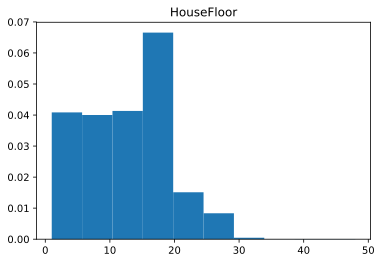

In [2677]:
plt.hist(data['HouseFloor'],density = True)
plt.title('HouseFloor')
plt.show()

В итоге по полю 'HouseFloor' содержатся значения от 1 до 42 м, причем 75% квартир с количеством этажей в доме  < 17 м. Похоже на правду. Пропуски в данных отстутствуют.

#### 7. Floor

Посмотрим на значения 'Floor',которые больше чем этажей в доме.

In [2678]:
data.loc[data['Floor'] > data['HouseFloor'],:]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
14    10953          27    1.0   53.769097   52.408027            6.0      5   
16     2119          27    2.0   49.360648   31.993964            5.0      6   
21    11935          27    2.0   64.711835   41.065770            6.0     15   
35     6486         200    3.0   85.280389   58.447967            9.0      6   
51    10103          94    1.0   35.280894   23.354176            6.0     11   
67     8443          57    2.0   45.964890   29.141212            5.0      7   
68     1063          77    1.0   42.678844   23.918634            8.0     14   
72    14675          74    1.0   52.457589   52.423345            6.0     18   
76    14020          34    1.0   47.909327   42.782385            6.0      2   
86     9613         148    3.0  127.481583   80.899103            6.0     16   
87    16674          94    2.0   47.145626   30.738284            5.0     11   
95     4280          34    2.0   61.334968   40.448272            6.0     26   
104    2930           9    2.0   62.347154   39.565157            6.0      6   
115   12377          27    2.0   60.445855   38.358603            6.0     13   
119     367          45    1.0   42.367289   40.012529            6.0     16   
122    5267          49    1.0   43.444266   20.702409            8.0     18   
123    8753          25    3.0   85.952306   56.598997            6.0      4   
129    6072           6    1.0   65.102017   64.622603            6.0     10   
131   10726          27    3.0   89.692964   87.623814            6.0     13   
141    3839          31    3.0   78.471987   52.706824            8.0      6   
145   14787          34    2.0   60.366626   57.709149           10.0     20   
152   14141          23    2.0   57.699619   36.615857           10.0      2   
153    9870          62    1.0   51.831473   34.130665            6.0      5   
155   14109          62    1.0   47.577280   43.123508            6.0      6   
156   14258          44    2.0   44.511407   29.847462            5.0      6   
157   15848          23    3.0   70.214575   49.364085            9.0      3   
160    3522           6    1.0   66.419841   43.801568            6.0      2   
161    4263          27    1.0   54.255191   51.135219            6.0      5   
167    7023           1    2.0   71.005575   45.059743            6.0     11   
170    4747           7    3.0   81.467909   76.646182           10.0     19   
...     ...         ...    ...         ...         ...            ...    ...   
9821   3469          27    3.0  103.654338   65.778466            6.0      5   
9822  12992          75    2.0   47.917740   29.839365            5.0      7   
9828  13630          24    3.0  127.141143   83.845149            6.0      3   
9837   5482         157    2.0   48.185943   33.156377            7.0      9   
9847    759          29    1.0   36.298652   20.959605            6.0      7   
9852  16641         111    4.0  117.201937   69.898092           14.0      4   
9853  12913           8    2.0   48.406418   30.717760            5.0     13   
9869  16299         107    2.0   57.284603   34.599765            7.0      6   
9870    309          27    1.0   37.551366   23.829888            6.0     11   
9871   6121          48    1.0   41.783808   27.514347            6.0     17   
9872  14136          12    1.0   43.711302   20.130061            8.0     18   
9917   1901          94    1.0   45.822669   29.078811            6.0      7   
9924   3327         145    1.0   41.093702   20.643619            8.0     18   
9931  13355          27    2.0   64.261856   40.780216            6.0     10   
9938  15868           9    2.0   64.412326   61.337938            6.0     13   
9942   9369           1    2.0   56.323990   35.742891            6.0     18   
9949   3355          53    1.0   39.211416   36.159431            6.0     19   
9951   9237          25    1.0   33.516313   31.086243            6.0     13   
9954    5

Заменим значения 'HouseFloor' на 'Floor'

In [2679]:
data.loc[(data['Floor'] > data['HouseFloor'])&(data['Floor']< 30),'HouseFloor'] = data ['Floor']

In [2680]:
data.loc[(data['Floor'] > data['HouseFloor'])&(data['Floor']> 30),:] 

Empty DataFrame
Columns: [Id, DistrictId, Rooms, Square, LifeSquare, KitchenSquare, Floor, HouseFloor, HouseYear, Ecology_1, Ecology_2, Ecology_3, Social_1, Social_2, Social_3, Healthcare_1, Helthcare_2, Shops_1, Shops_2, Price]
Index: []

In [2681]:
data.describe()

Id   DistrictId        Rooms       Square   LifeSquare  \
count   9976.000000  9976.000000  9976.000000  9976.000000  9976.000000   
mean    8384.692662    50.438553     1.888532    56.184941    36.179682   
std     4859.419664    43.608652     0.810956    18.871473    14.570754   
min        0.000000     0.000000     1.000000    15.988889    10.628701   
25%     4169.500000    20.000000     1.000000    41.784346    25.125151   
50%     8395.500000    36.000000     2.000000    52.535436    33.223225   
75%    12594.250000    75.000000     2.000000    65.900625    44.180616   
max    16798.000000   209.000000     5.000000   200.334539   161.504222   

       KitchenSquare        Floor   HouseFloor     HouseYear    Ecology_1  \
count    9976.000000  9976.000000  9976.000000  9.976000e+03  9976.000000   
mean        7.340814     8.523055    13.363472  3.994972e+03     0.118841   
std         2.193316     5.232870     5.781190  2.007413e+05     0.119097   
min         3.000000     1.000000     1.000000  1.910000e+03     0.000000   
25%         6.000000     4.000000     9.000000  1.974000e+03     0.017647   
50%         6.000000     7.000000    14.000000  1.977000e+03     0.075424   
75%         9.000000    12.000000    17.000000  2.001000e+03     0.195781   
max        22.879933    42.000000    48.000000  2.005201e+07     0.521867   

          Social_1      Social_2     Social_3  Healthcare_1  Helthcare_2  \
count  9976.000000   9976.000000  9976.000000   5191.000000  9976.000000   
mean     24.694868   5353.636929     8.040798   1142.809093     1.319366   
std      17.526439   4005.507022    23.821135   1020.958545     1.493394   
min       0.000000    168.000000     0.000000      0.000000     0.000000   
25%       6.000000   1564.000000     0.000000    350.000000     0.000000   
50%      25.000000   5285.000000     2.000000    900.000000     1.000000   
75%      36.000000   7227.000000     5.000000   1548.000000     2.000000   
max      74.000000  19083.000000   141.000000   4849.000000     6.000000   

           Shops_1          Price  
count  9976.000000    9976.000000  
mean      4.230754  214092.153956  
std       4.804351   92782.114935  
min       0.000000   59174.778028  
25%       1.000000  153891.653482  
50%       3.000000  192269.644879  
75%       6.000000  249100.769116  
max      23.000000  633233.466570

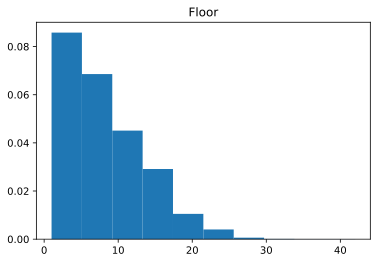

In [2682]:
plt.hist(data['Floor'],density = True)
plt.title('Floor')
plt.show()

В итоге по полю 'Floor' содержатся значения от 1 до 42 м, причем 75% квартир с этажом < 12 м. Похоже на правду. Пропуски в данных отстутствуют.

#### 8.HouseYear

Посмотрим на подозрительно большие значения

In [2683]:
data.loc[data['HouseYear'] > 2020,:]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
1497  10814         109    1.0  37.265070   20.239714            9.0      9   
4189  11607         147    2.0  44.791836   28.360393            5.0      4   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
1497        12.0   20052011   0.136330         B         B        30   
4189         9.0       4968   0.319809         B         B        25   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
1497      6141        10         262.0            3        6       B   
4189      4756        16        2857.0            5        8       B   

              Price  
1497  254084.534396  
4189  243028.603096

Заменим на медиану

In [2684]:
data.loc[data['HouseYear'] > 2020,'HouseYear'] = data['HouseYear'].median()

In [2685]:
data.describe()

Id   DistrictId        Rooms       Square   LifeSquare  \
count   9976.000000  9976.000000  9976.000000  9976.000000  9976.000000   
mean    8384.692662    50.438553     1.888532    56.184941    36.179682   
std     4859.419664    43.608652     0.810956    18.871473    14.570754   
min        0.000000     0.000000     1.000000    15.988889    10.628701   
25%     4169.500000    20.000000     1.000000    41.784346    25.125151   
50%     8395.500000    36.000000     2.000000    52.535436    33.223225   
75%    12594.250000    75.000000     2.000000    65.900625    44.180616   
max    16798.000000   209.000000     5.000000   200.334539   161.504222   

       KitchenSquare        Floor   HouseFloor    HouseYear    Ecology_1  \
count    9976.000000  9976.000000  9976.000000  9976.000000  9976.000000   
mean        7.340814     8.523055    13.363472  1984.845128     0.118841   
std         2.193316     5.232870     5.781190    18.407026     0.119097   
min         3.000000     1.000000     1.000000  1910.000000     0.000000   
25%         6.000000     4.000000     9.000000  1974.000000     0.017647   
50%         6.000000     7.000000    14.000000  1977.000000     0.075424   
75%         9.000000    12.000000    17.000000  2001.000000     0.195781   
max        22.879933    42.000000    48.000000  2020.000000     0.521867   

          Social_1      Social_2     Social_3  Healthcare_1  Helthcare_2  \
count  9976.000000   9976.000000  9976.000000   5191.000000  9976.000000   
mean     24.694868   5353.636929     8.040798   1142.809093     1.319366   
std      17.526439   4005.507022    23.821135   1020.958545     1.493394   
min       0.000000    168.000000     0.000000      0.000000     0.000000   
25%       6.000000   1564.000000     0.000000    350.000000     0.000000   
50%      25.000000   5285.000000     2.000000    900.000000     1.000000   
75%      36.000000   7227.000000     5.000000   1548.000000     2.000000   
max      74.000000  19083.000000   141.000000   4849.000000     6.000000   

           Shops_1          Price  
count  9976.000000    9976.000000  
mean      4.230754  214092.153956  
std       4.804351   92782.114935  
min       0.000000   59174.778028  
25%       1.000000  153891.653482  
50%       3.000000  192269.644879  
75%       6.000000  249100.769116  
max      23.000000  633233.466570

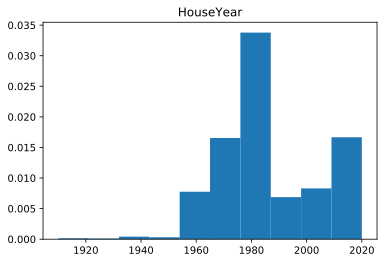

In [2686]:
plt.hist(data['HouseYear'],density = True)
plt.title('HouseYear')
plt.show()

В итоге в признаке 'HouseYear' содержатся значения от 1910 до 2200 г., причем 75% квартир старше 2001 г. Похоже на правду. Пропуски в данных отстутствуют.

#### 9. Ecology_1

Посмотрим на значения.

In [2687]:
data['Ecology_1'].value_counts()

7.122317e-03    585
0.000000e+00    537
2.432045e-01    509
7.215758e-02    486
7.577876e-02    346
7.815280e-05    244
6.975336e-02    203
1.615317e-01    200
3.465608e-02    190
9.079910e-02    175
2.114012e-01    168
3.711490e-01    163
4.111635e-02    151
4.963726e-02    148
1.764705e-02    141
1.165413e-02    140
4.378852e-01    137
1.957811e-01    127
3.003225e-01    117
1.185374e-01    109
1.944893e-01    103
6.076152e-03     99
3.349371e-02     98
1.332153e-01     95
4.112463e-02     89
1.273759e-01     88
5.090006e-02     87
6.966034e-02     86
1.950880e-02     84
3.717782e-02     84
               ... 
5.194206e-02     31
3.101991e-01     29
1.489039e-01     27
1.747391e-01     25
3.731645e-02     25
1.501689e-02     25
1.301228e-01     25
8.688527e-02     24
4.862456e-01     22
8.761909e-02     22
2.104732e-01     20
8.194346e-02     19
3.270180e-01     18
4.986339e-02     16
3.627009e-02     16
4.230727e-02     15
4.072762e-01     14
2.982046e-01     13
1.973680e-01     12


In [2688]:
data.describe()

Id   DistrictId        Rooms       Square   LifeSquare  \
count   9976.000000  9976.000000  9976.000000  9976.000000  9976.000000   
mean    8384.692662    50.438553     1.888532    56.184941    36.179682   
std     4859.419664    43.608652     0.810956    18.871473    14.570754   
min        0.000000     0.000000     1.000000    15.988889    10.628701   
25%     4169.500000    20.000000     1.000000    41.784346    25.125151   
50%     8395.500000    36.000000     2.000000    52.535436    33.223225   
75%    12594.250000    75.000000     2.000000    65.900625    44.180616   
max    16798.000000   209.000000     5.000000   200.334539   161.504222   

       KitchenSquare        Floor   HouseFloor    HouseYear    Ecology_1  \
count    9976.000000  9976.000000  9976.000000  9976.000000  9976.000000   
mean        7.340814     8.523055    13.363472  1984.845128     0.118841   
std         2.193316     5.232870     5.781190    18.407026     0.119097   
min         3.000000     1.000000     1.000000  1910.000000     0.000000   
25%         6.000000     4.000000     9.000000  1974.000000     0.017647   
50%         6.000000     7.000000    14.000000  1977.000000     0.075424   
75%         9.000000    12.000000    17.000000  2001.000000     0.195781   
max        22.879933    42.000000    48.000000  2020.000000     0.521867   

          Social_1      Social_2     Social_3  Healthcare_1  Helthcare_2  \
count  9976.000000   9976.000000  9976.000000   5191.000000  9976.000000   
mean     24.694868   5353.636929     8.040798   1142.809093     1.319366   
std      17.526439   4005.507022    23.821135   1020.958545     1.493394   
min       0.000000    168.000000     0.000000      0.000000     0.000000   
25%       6.000000   1564.000000     0.000000    350.000000     0.000000   
50%      25.000000   5285.000000     2.000000    900.000000     1.000000   
75%      36.000000   7227.000000     5.000000   1548.000000     2.000000   
max      74.000000  19083.000000   141.000000   4849.000000     6.000000   

           Shops_1          Price  
count  9976.000000    9976.000000  
mean      4.230754  214092.153956  
std       4.804351   92782.114935  
min       0.000000   59174.778028  
25%       1.000000  153891.653482  
50%       3.000000  192269.644879  
75%       6.000000  249100.769116  
max      23.000000  633233.466570

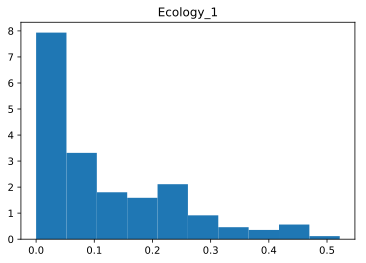

In [2689]:
plt.hist(data['Ecology_1'],density = True)
#plt.scatter(data['Ecology_1'],data['Price'])
plt.title('Ecology_1')
plt.show()

В стобце содержатся значения от 0 до 0,52. Более 75% значений < 0,2. Но при этом данные дискретные, разбиты на 129 категорий.Пропуски отсутствуют.

#### 10. Ecology_2

Посмотрим на значения

In [2690]:
data['Ecology_2'].value_counts()

B    9879
A      97
Name: Ecology_2, dtype: int64

Заменим на 0 и 1.

In [2691]:
data['Ecology_2'] = (data['Ecology_2'] == 'A').astype(int)

In [2692]:
data['Ecology_2'].value_counts()

0    9879
1      97
Name: Ecology_2, dtype: int64

In [2693]:
data.describe()

Id   DistrictId        Rooms       Square   LifeSquare  \
count   9976.000000  9976.000000  9976.000000  9976.000000  9976.000000   
mean    8384.692662    50.438553     1.888532    56.184941    36.179682   
std     4859.419664    43.608652     0.810956    18.871473    14.570754   
min        0.000000     0.000000     1.000000    15.988889    10.628701   
25%     4169.500000    20.000000     1.000000    41.784346    25.125151   
50%     8395.500000    36.000000     2.000000    52.535436    33.223225   
75%    12594.250000    75.000000     2.000000    65.900625    44.180616   
max    16798.000000   209.000000     5.000000   200.334539   161.504222   

       KitchenSquare        Floor   HouseFloor    HouseYear    Ecology_1  \
count    9976.000000  9976.000000  9976.000000  9976.000000  9976.000000   
mean        7.340814     8.523055    13.363472  1984.845128     0.118841   
std         2.193316     5.232870     5.781190    18.407026     0.119097   
min         3.000000     1.000000     1.000000  1910.000000     0.000000   
25%         6.000000     4.000000     9.000000  1974.000000     0.017647   
50%         6.000000     7.000000    14.000000  1977.000000     0.075424   
75%         9.000000    12.000000    17.000000  2001.000000     0.195781   
max        22.879933    42.000000    48.000000  2020.000000     0.521867   

         Ecology_2     Social_1      Social_2     Social_3  Healthcare_1  \
count  9976.000000  9976.000000   9976.000000  9976.000000   5191.000000   
mean      0.009723    24.694868   5353.636929     8.040798   1142.809093   
std       0.098131    17.526439   4005.507022    23.821135   1020.958545   
min       0.000000     0.000000    168.000000     0.000000      0.000000   
25%       0.000000     6.000000   1564.000000     0.000000    350.000000   
50%       0.000000    25.000000   5285.000000     2.000000    900.000000   
75%       0.000000    36.000000   7227.000000     5.000000   1548.000000   
max       1.000000    74.000000  19083.000000   141.000000   4849.000000   

       Helthcare_2      Shops_1          Price  
count  9976.000000  9976.000000    9976.000000  
mean      1.319366     4.230754  214092.153956  
std       1.493394     4.804351   92782.114935  
min       0.000000     0.000000   59174.778028  
25%       0.000000     1.000000  153891.653482  
50%       1.000000     3.000000  192269.644879  
75%       2.000000     6.000000  249100.769116  
max       6.000000    23.000000  633233.466570

Какие-то категориальные данные, причем ,у большей части квартир данный признак отсутствует. Пропусков нет

#### 11. Ecology_3

Посмотрим на данные

In [2694]:
data['Ecology_3'].value_counts()

B    9702
A     274
Name: Ecology_3, dtype: int64

Заменим на 0 и 1

In [2695]:
data['Ecology_3'] = (data['Ecology_3'] == 'A').astype(int)

In [2696]:
data['Ecology_3'].value_counts()

0    9702
1     274
Name: Ecology_3, dtype: int64

In [2697]:
data.describe()

Id   DistrictId        Rooms       Square   LifeSquare  \
count   9976.000000  9976.000000  9976.000000  9976.000000  9976.000000   
mean    8384.692662    50.438553     1.888532    56.184941    36.179682   
std     4859.419664    43.608652     0.810956    18.871473    14.570754   
min        0.000000     0.000000     1.000000    15.988889    10.628701   
25%     4169.500000    20.000000     1.000000    41.784346    25.125151   
50%     8395.500000    36.000000     2.000000    52.535436    33.223225   
75%    12594.250000    75.000000     2.000000    65.900625    44.180616   
max    16798.000000   209.000000     5.000000   200.334539   161.504222   

       KitchenSquare        Floor   HouseFloor    HouseYear    Ecology_1  \
count    9976.000000  9976.000000  9976.000000  9976.000000  9976.000000   
mean        7.340814     8.523055    13.363472  1984.845128     0.118841   
std         2.193316     5.232870     5.781190    18.407026     0.119097   
min         3.000000     1.000000     1.000000  1910.000000     0.000000   
25%         6.000000     4.000000     9.000000  1974.000000     0.017647   
50%         6.000000     7.000000    14.000000  1977.000000     0.075424   
75%         9.000000    12.000000    17.000000  2001.000000     0.195781   
max        22.879933    42.000000    48.000000  2020.000000     0.521867   

         Ecology_2    Ecology_3     Social_1      Social_2     Social_3  \
count  9976.000000  9976.000000  9976.000000   9976.000000  9976.000000   
mean      0.009723     0.027466    24.694868   5353.636929     8.040798   
std       0.098131     0.163445    17.526439   4005.507022    23.821135   
min       0.000000     0.000000     0.000000    168.000000     0.000000   
25%       0.000000     0.000000     6.000000   1564.000000     0.000000   
50%       0.000000     0.000000    25.000000   5285.000000     2.000000   
75%       0.000000     0.000000    36.000000   7227.000000     5.000000   
max       1.000000     1.000000    74.000000  19083.000000   141.000000   

       Healthcare_1  Helthcare_2      Shops_1          Price  
count   5191.000000  9976.000000  9976.000000    9976.000000  
mean    1142.809093     1.319366     4.230754  214092.153956  
std     1020.958545     1.493394     4.804351   92782.114935  
min        0.000000     0.000000     0.000000   59174.778028  
25%      350.000000     0.000000     1.000000  153891.653482  
50%      900.000000     1.000000     3.000000  192269.644879  
75%     1548.000000     2.000000     6.000000  249100.769116  
max     4849.000000     6.000000    23.000000  633233.466570

Тоже категориальные данные,у большей части квартир данный признак отсутствует. Пропусков нет

#### 12. Social_1

Посмотрим на содержание

In [2698]:
data['Social_1'].value_counts()

2     687
1     652
25    555
5     526
30    464
23    433
6     377
22    366
53    354
34    311
33    252
46    245
31    242
43    237
9     209
36    209
21    207
37    205
24    205
52    201
0     201
35    200
47    177
74    175
39    159
27    151
28    144
4     140
11    137
42    129
26    126
16    122
19    118
66     98
17     96
49     95
18     92
32     87
41     83
50     79
29     70
38     64
8      62
15     50
20     50
14     46
10     24
13     22
12     18
7      15
3       9
Name: Social_1, dtype: int64

In [2699]:
data.describe()

Id   DistrictId        Rooms       Square   LifeSquare  \
count   9976.000000  9976.000000  9976.000000  9976.000000  9976.000000   
mean    8384.692662    50.438553     1.888532    56.184941    36.179682   
std     4859.419664    43.608652     0.810956    18.871473    14.570754   
min        0.000000     0.000000     1.000000    15.988889    10.628701   
25%     4169.500000    20.000000     1.000000    41.784346    25.125151   
50%     8395.500000    36.000000     2.000000    52.535436    33.223225   
75%    12594.250000    75.000000     2.000000    65.900625    44.180616   
max    16798.000000   209.000000     5.000000   200.334539   161.504222   

       KitchenSquare        Floor   HouseFloor    HouseYear    Ecology_1  \
count    9976.000000  9976.000000  9976.000000  9976.000000  9976.000000   
mean        7.340814     8.523055    13.363472  1984.845128     0.118841   
std         2.193316     5.232870     5.781190    18.407026     0.119097   
min         3.000000     1.000000     1.000000  1910.000000     0.000000   
25%         6.000000     4.000000     9.000000  1974.000000     0.017647   
50%         6.000000     7.000000    14.000000  1977.000000     0.075424   
75%         9.000000    12.000000    17.000000  2001.000000     0.195781   
max        22.879933    42.000000    48.000000  2020.000000     0.521867   

         Ecology_2    Ecology_3     Social_1      Social_2     Social_3  \
count  9976.000000  9976.000000  9976.000000   9976.000000  9976.000000   
mean      0.009723     0.027466    24.694868   5353.636929     8.040798   
std       0.098131     0.163445    17.526439   4005.507022    23.821135   
min       0.000000     0.000000     0.000000    168.000000     0.000000   
25%       0.000000     0.000000     6.000000   1564.000000     0.000000   
50%       0.000000     0.000000    25.000000   5285.000000     2.000000   
75%       0.000000     0.000000    36.000000   7227.000000     5.000000   
max       1.000000     1.000000    74.000000  19083.000000   141.000000   

       Healthcare_1  Helthcare_2      Shops_1          Price  
count   5191.000000  9976.000000  9976.000000    9976.000000  
mean    1142.809093     1.319366     4.230754  214092.153956  
std     1020.958545     1.493394     4.804351   92782.114935  
min        0.000000     0.000000     0.000000   59174.778028  
25%      350.000000     0.000000     1.000000  153891.653482  
50%      900.000000     1.000000     3.000000  192269.644879  
75%     1548.000000     2.000000     6.000000  249100.769116  
max     4849.000000     6.000000    23.000000  633233.466570

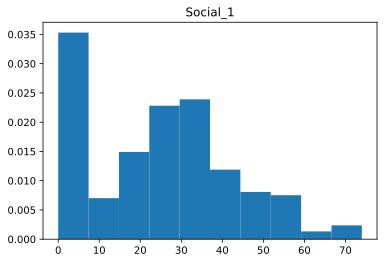

In [2700]:
plt.hist(data['Social_1'],density = True)
#plt.scatter(data['Social_1'],data['Price'])
plt.title('Social_1')
plt.show()

Тоже категориальные признаки. Значения от 0 до 74. 75% значений < 36. Пропусков нет.

#### 13. Social_2

Посмотрим на значения

In [2701]:
data['Social_2'].value_counts()

264      585
1564     509
629      486
1437     346
6398     244
13670    203
5648     200
168      190
19083    175
1892     168
7065     163
14892    151
7759     148
469      141
915      140
5735     137
5212     127
10311    117
6207     109
8004     103
5285      99
10573     98
11395     95
9515      89
8429      88
10621     87
6119      86
11217     84
7687      84
6558      83
        ... 
6748      25
3079      25
3379      25
2277      24
3684      23
1497      22
2514      22
2398      20
2738      19
2270      18
3746      16
1318      16
2733      15
1660      15
2810      15
1768      14
4048      13
2423      12
1227      11
186       11
290       11
3681      10
2940       9
760        7
1135       6
568        3
1423       3
662        2
507        1
528        1
Name: Social_2, Length: 142, dtype: int64

In [2702]:
data.describe()

Id   DistrictId        Rooms       Square   LifeSquare  \
count   9976.000000  9976.000000  9976.000000  9976.000000  9976.000000   
mean    8384.692662    50.438553     1.888532    56.184941    36.179682   
std     4859.419664    43.608652     0.810956    18.871473    14.570754   
min        0.000000     0.000000     1.000000    15.988889    10.628701   
25%     4169.500000    20.000000     1.000000    41.784346    25.125151   
50%     8395.500000    36.000000     2.000000    52.535436    33.223225   
75%    12594.250000    75.000000     2.000000    65.900625    44.180616   
max    16798.000000   209.000000     5.000000   200.334539   161.504222   

       KitchenSquare        Floor   HouseFloor    HouseYear    Ecology_1  \
count    9976.000000  9976.000000  9976.000000  9976.000000  9976.000000   
mean        7.340814     8.523055    13.363472  1984.845128     0.118841   
std         2.193316     5.232870     5.781190    18.407026     0.119097   
min         3.000000     1.000000     1.000000  1910.000000     0.000000   
25%         6.000000     4.000000     9.000000  1974.000000     0.017647   
50%         6.000000     7.000000    14.000000  1977.000000     0.075424   
75%         9.000000    12.000000    17.000000  2001.000000     0.195781   
max        22.879933    42.000000    48.000000  2020.000000     0.521867   

         Ecology_2    Ecology_3     Social_1      Social_2     Social_3  \
count  9976.000000  9976.000000  9976.000000   9976.000000  9976.000000   
mean      0.009723     0.027466    24.694868   5353.636929     8.040798   
std       0.098131     0.163445    17.526439   4005.507022    23.821135   
min       0.000000     0.000000     0.000000    168.000000     0.000000   
25%       0.000000     0.000000     6.000000   1564.000000     0.000000   
50%       0.000000     0.000000    25.000000   5285.000000     2.000000   
75%       0.000000     0.000000    36.000000   7227.000000     5.000000   
max       1.000000     1.000000    74.000000  19083.000000   141.000000   

       Healthcare_1  Helthcare_2      Shops_1          Price  
count   5191.000000  9976.000000  9976.000000    9976.000000  
mean    1142.809093     1.319366     4.230754  214092.153956  
std     1020.958545     1.493394     4.804351   92782.114935  
min        0.000000     0.000000     0.000000   59174.778028  
25%      350.000000     0.000000     1.000000  153891.653482  
50%      900.000000     1.000000     3.000000  192269.644879  
75%     1548.000000     2.000000     6.000000  249100.769116  
max     4849.000000     6.000000    23.000000  633233.466570

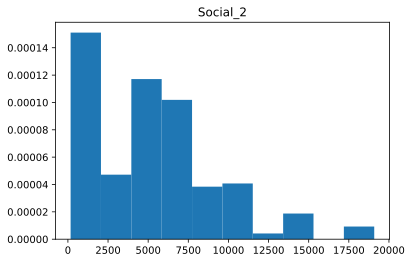

In [2703]:
plt.hist(data['Social_2'],density = True)
#plt.scatter(data['Social_2'],data['Price'])
plt.title('Social_2')
plt.show()

Категориальные данные. Пропусков нет. Значения от 168 до 19083. 75% значений < 7227. Всего 142 категории.

#### 14. Social_3

Посмотрим на данные

In [2704]:
data['Social_3'].value_counts()

0      2986
1      1857
3      1135
4       833
2       633
6       421
5       390
141     244
9       192
7       184
11      172
8       170
10      142
16      101
14       97
27       59
48       58
56       49
84       43
24       37
87       27
59       25
93       25
19       22
20       19
23       18
39       15
73       10
45        9
37        3
Name: Social_3, dtype: int64

In [2705]:
data.describe()

Id   DistrictId        Rooms       Square   LifeSquare  \
count   9976.000000  9976.000000  9976.000000  9976.000000  9976.000000   
mean    8384.692662    50.438553     1.888532    56.184941    36.179682   
std     4859.419664    43.608652     0.810956    18.871473    14.570754   
min        0.000000     0.000000     1.000000    15.988889    10.628701   
25%     4169.500000    20.000000     1.000000    41.784346    25.125151   
50%     8395.500000    36.000000     2.000000    52.535436    33.223225   
75%    12594.250000    75.000000     2.000000    65.900625    44.180616   
max    16798.000000   209.000000     5.000000   200.334539   161.504222   

       KitchenSquare        Floor   HouseFloor    HouseYear    Ecology_1  \
count    9976.000000  9976.000000  9976.000000  9976.000000  9976.000000   
mean        7.340814     8.523055    13.363472  1984.845128     0.118841   
std         2.193316     5.232870     5.781190    18.407026     0.119097   
min         3.000000     1.000000     1.000000  1910.000000     0.000000   
25%         6.000000     4.000000     9.000000  1974.000000     0.017647   
50%         6.000000     7.000000    14.000000  1977.000000     0.075424   
75%         9.000000    12.000000    17.000000  2001.000000     0.195781   
max        22.879933    42.000000    48.000000  2020.000000     0.521867   

         Ecology_2    Ecology_3     Social_1      Social_2     Social_3  \
count  9976.000000  9976.000000  9976.000000   9976.000000  9976.000000   
mean      0.009723     0.027466    24.694868   5353.636929     8.040798   
std       0.098131     0.163445    17.526439   4005.507022    23.821135   
min       0.000000     0.000000     0.000000    168.000000     0.000000   
25%       0.000000     0.000000     6.000000   1564.000000     0.000000   
50%       0.000000     0.000000    25.000000   5285.000000     2.000000   
75%       0.000000     0.000000    36.000000   7227.000000     5.000000   
max       1.000000     1.000000    74.000000  19083.000000   141.000000   

       Healthcare_1  Helthcare_2      Shops_1          Price  
count   5191.000000  9976.000000  9976.000000    9976.000000  
mean    1142.809093     1.319366     4.230754  214092.153956  
std     1020.958545     1.493394     4.804351   92782.114935  
min        0.000000     0.000000     0.000000   59174.778028  
25%      350.000000     0.000000     1.000000  153891.653482  
50%      900.000000     1.000000     3.000000  192269.644879  
75%     1548.000000     2.000000     6.000000  249100.769116  
max     4849.000000     6.000000    23.000000  633233.466570

In [2706]:
data.loc[data['Social_3'] > 100,'Social_3'] = data['Social_3'].median()

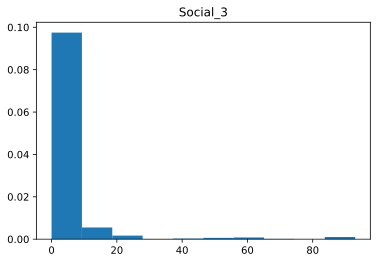

In [2707]:
plt.hist(data['Social_3'],density = True)
#plt.scatter(data['Social_2'],data['Price'])
plt.title('Social_3')
plt.show()

Категориальные данные. Пропусков нет. Значения от 0 до 141. 75% значений < 5. Странное распределение,но категория со значением 141 встречается 244 раза. Не похоже,что это ошибка.

#### 15.Healthcare_1

Смотрим на данные

In [2708]:
data['Healthcare_1'].value_counts()

540.0     509
30.0      346
1046.0    244
750.0     163
229.0     148
2300.0    142
1084.0    137
240.0     127
1183.0    109
125.0     103
645.0      99
1322.0     98
1406.0     95
176.0      84
1548.0     83
2672.0     79
1970.0     79
1937.0     78
2078.0     76
990.0      75
1145.0     74
350.0      73
900.0      71
1894.0     70
1130.0     67
2857.0     67
325.0      65
1015.0     63
830.0      62
1036.0     60
         ... 
320.0      38
4129.0     37
1308.0     35
2715.0     35
80.0       35
628.0      34
1575.0     34
810.0      34
770.0      33
1020.0     32
800.0      31
562.0      28
4702.0     27
620.0      27
1430.0     27
100.0      25
2890.0     25
1547.0     24
1994.0     20
2500.0     18
75.0       16
200.0      16
920.0      15
1786.0     15
4849.0     15
370.0      14
32.0       12
1815.0     10
35.0        2
0.0         1
Name: Healthcare_1, Length: 79, dtype: int64

In [2709]:
data.describe()

Id   DistrictId        Rooms       Square   LifeSquare  \
count   9976.000000  9976.000000  9976.000000  9976.000000  9976.000000   
mean    8384.692662    50.438553     1.888532    56.184941    36.179682   
std     4859.419664    43.608652     0.810956    18.871473    14.570754   
min        0.000000     0.000000     1.000000    15.988889    10.628701   
25%     4169.500000    20.000000     1.000000    41.784346    25.125151   
50%     8395.500000    36.000000     2.000000    52.535436    33.223225   
75%    12594.250000    75.000000     2.000000    65.900625    44.180616   
max    16798.000000   209.000000     5.000000   200.334539   161.504222   

       KitchenSquare        Floor   HouseFloor    HouseYear    Ecology_1  \
count    9976.000000  9976.000000  9976.000000  9976.000000  9976.000000   
mean        7.340814     8.523055    13.363472  1984.845128     0.118841   
std         2.193316     5.232870     5.781190    18.407026     0.119097   
min         3.000000     1.000000     1.000000  1910.000000     0.000000   
25%         6.000000     4.000000     9.000000  1974.000000     0.017647   
50%         6.000000     7.000000    14.000000  1977.000000     0.075424   
75%         9.000000    12.000000    17.000000  2001.000000     0.195781   
max        22.879933    42.000000    48.000000  2020.000000     0.521867   

         Ecology_2    Ecology_3     Social_1      Social_2     Social_3  \
count  9976.000000  9976.000000  9976.000000   9976.000000  9976.000000   
mean      0.009723     0.027466    24.694868   5353.636929     4.641038   
std       0.098131     0.163445    17.526439   4005.507022    11.151306   
min       0.000000     0.000000     0.000000    168.000000     0.000000   
25%       0.000000     0.000000     6.000000   1564.000000     0.000000   
50%       0.000000     0.000000    25.000000   5285.000000     2.000000   
75%       0.000000     0.000000    36.000000   7227.000000     4.000000   
max       1.000000     1.000000    74.000000  19083.000000    93.000000   

       Healthcare_1  Helthcare_2      Shops_1          Price  
count   5191.000000  9976.000000  9976.000000    9976.000000  
mean    1142.809093     1.319366     4.230754  214092.153956  
std     1020.958545     1.493394     4.804351   92782.114935  
min        0.000000     0.000000     0.000000   59174.778028  
25%      350.000000     0.000000     1.000000  153891.653482  
50%      900.000000     1.000000     3.000000  192269.644879  
75%     1548.000000     2.000000     6.000000  249100.769116  
max     4849.000000     6.000000    23.000000  633233.466570

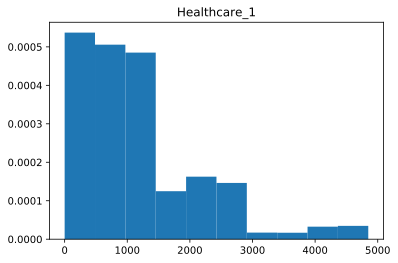

In [2710]:
plt.hist(data['Healthcare_1'],density = True)
#plt.scatter(data['Healthcare_1],data['Price'])
plt.title('Healthcare_1')
plt.show()

Категориальные данные. Значения от 350 до 4849. 75% < 1548. Практически половина данных отсутствует. Пока оставим так

#### 16.Helthcare_2

Посмотрим на данные

In [2711]:
data['Helthcare_2'].value_counts()

0    4202
1    2181
3    1664
2    1156
5     387
4     287
6      99
Name: Helthcare_2, dtype: int64

In [2712]:
data.describe()

Id   DistrictId        Rooms       Square   LifeSquare  \
count   9976.000000  9976.000000  9976.000000  9976.000000  9976.000000   
mean    8384.692662    50.438553     1.888532    56.184941    36.179682   
std     4859.419664    43.608652     0.810956    18.871473    14.570754   
min        0.000000     0.000000     1.000000    15.988889    10.628701   
25%     4169.500000    20.000000     1.000000    41.784346    25.125151   
50%     8395.500000    36.000000     2.000000    52.535436    33.223225   
75%    12594.250000    75.000000     2.000000    65.900625    44.180616   
max    16798.000000   209.000000     5.000000   200.334539   161.504222   

       KitchenSquare        Floor   HouseFloor    HouseYear    Ecology_1  \
count    9976.000000  9976.000000  9976.000000  9976.000000  9976.000000   
mean        7.340814     8.523055    13.363472  1984.845128     0.118841   
std         2.193316     5.232870     5.781190    18.407026     0.119097   
min         3.000000     1.000000     1.000000  1910.000000     0.000000   
25%         6.000000     4.000000     9.000000  1974.000000     0.017647   
50%         6.000000     7.000000    14.000000  1977.000000     0.075424   
75%         9.000000    12.000000    17.000000  2001.000000     0.195781   
max        22.879933    42.000000    48.000000  2020.000000     0.521867   

         Ecology_2    Ecology_3     Social_1      Social_2     Social_3  \
count  9976.000000  9976.000000  9976.000000   9976.000000  9976.000000   
mean      0.009723     0.027466    24.694868   5353.636929     4.641038   
std       0.098131     0.163445    17.526439   4005.507022    11.151306   
min       0.000000     0.000000     0.000000    168.000000     0.000000   
25%       0.000000     0.000000     6.000000   1564.000000     0.000000   
50%       0.000000     0.000000    25.000000   5285.000000     2.000000   
75%       0.000000     0.000000    36.000000   7227.000000     4.000000   
max       1.000000     1.000000    74.000000  19083.000000    93.000000   

       Healthcare_1  Helthcare_2      Shops_1          Price  
count   5191.000000  9976.000000  9976.000000    9976.000000  
mean    1142.809093     1.319366     4.230754  214092.153956  
std     1020.958545     1.493394     4.804351   92782.114935  
min        0.000000     0.000000     0.000000   59174.778028  
25%      350.000000     0.000000     1.000000  153891.653482  
50%      900.000000     1.000000     3.000000  192269.644879  
75%     1548.000000     2.000000     6.000000  249100.769116  
max     4849.000000     6.000000    23.000000  633233.466570

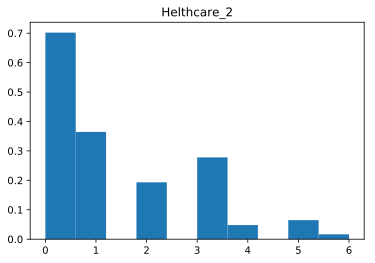

In [2713]:
plt.hist(data['Helthcare_2'],density = True)
#plt.scatter(data['Helthcare_2],data['Price'])
plt.title('Helthcare_2')
plt.show()

Категориальные данные, пропусков нет.

#### 17.Shops_1

Посмотрим на значения

In [2714]:
data['Shops_1'].value_counts()

0     2310
5     1323
1     1319
2      963
4      839
3      711
6      486
11     400
9      315
7      292
8      252
23     244
10     215
15     175
16      83
19      49
Name: Shops_1, dtype: int64

In [2715]:
data.loc[data['Shops_1'] > 10,'Shops_1']= data['Shops_1'].median()

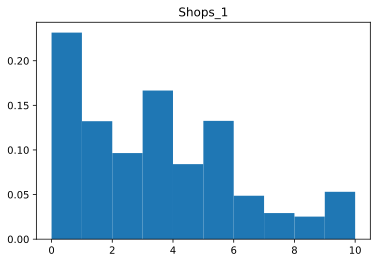

In [2716]:
plt.hist(data['Shops_1'],density = True)
#plt.scatter(data['Shops_1'],data['Price'])
plt.title('Shops_1')
plt.show()

Категориальные данные.Пропусков нет.

#### 18. Shops_2

Смотрим на данные

In [2717]:
data['Shops_2'].value_counts()

B    9151
A     825
Name: Shops_2, dtype: int64

Заменим на 0 и 1

In [2718]:
data['Shops_2'] = (data['Shops_2'] == 'A').astype(int)

In [2719]:
data['Shops_2'].value_counts()

0    9151
1     825
Name: Shops_2, dtype: int64

In [2720]:
data.describe()

Id   DistrictId        Rooms       Square   LifeSquare  \
count   9976.000000  9976.000000  9976.000000  9976.000000  9976.000000   
mean    8384.692662    50.438553     1.888532    56.184941    36.179682   
std     4859.419664    43.608652     0.810956    18.871473    14.570754   
min        0.000000     0.000000     1.000000    15.988889    10.628701   
25%     4169.500000    20.000000     1.000000    41.784346    25.125151   
50%     8395.500000    36.000000     2.000000    52.535436    33.223225   
75%    12594.250000    75.000000     2.000000    65.900625    44.180616   
max    16798.000000   209.000000     5.000000   200.334539   161.504222   

       KitchenSquare        Floor   HouseFloor    HouseYear    Ecology_1  \
count    9976.000000  9976.000000  9976.000000  9976.000000  9976.000000   
mean        7.340814     8.523055    13.363472  1984.845128     0.118841   
std         2.193316     5.232870     5.781190    18.407026     0.119097   
min         3.000000     1.000000     1.000000  1910.000000     0.000000   
25%         6.000000     4.000000     9.000000  1974.000000     0.017647   
50%         6.000000     7.000000    14.000000  1977.000000     0.075424   
75%         9.000000    12.000000    17.000000  2001.000000     0.195781   
max        22.879933    42.000000    48.000000  2020.000000     0.521867   

         Ecology_2    Ecology_3     Social_1      Social_2     Social_3  \
count  9976.000000  9976.000000  9976.000000   9976.000000  9976.000000   
mean      0.009723     0.027466    24.694868   5353.636929     4.641038   
std       0.098131     0.163445    17.526439   4005.507022    11.151306   
min       0.000000     0.000000     0.000000    168.000000     0.000000   
25%       0.000000     0.000000     6.000000   1564.000000     0.000000   
50%       0.000000     0.000000    25.000000   5285.000000     2.000000   
75%       0.000000     0.000000    36.000000   7227.000000     4.000000   
max       1.000000     1.000000    74.000000  19083.000000    93.000000   

       Healthcare_1  Helthcare_2      Shops_1      Shops_2          Price  
count   5191.000000  9976.000000  9976.000000  9976.000000    9976.000000  
mean    1142.809093     1.319366     3.023557     0.082698  214092.153956  
std     1020.958545     1.493394     2.656160     0.275440   92782.114935  
min        0.000000     0.000000     0.000000     0.000000   59174.778028  
25%      350.000000     0.000000     1.000000     0.000000  153891.653482  
50%      900.000000     1.000000     3.000000     0.000000  192269.644879  
75%     1548.000000     2.000000     5.000000     0.000000  249100.769116  
max     4849.000000     6.000000    10.000000     1.000000  633233.466570

Категориальные признаки. У большей части квартир признак отсутствует.

### Посмотрим влияние признаков на 'price'

In [2721]:
data_cor = data.corr()

In [2722]:
import seaborn as sns

In [2723]:
mask = np.zeros_like(data_cor, dtype=np.bool)

In [2724]:
mask[np.triu_indices_from(mask)] = True

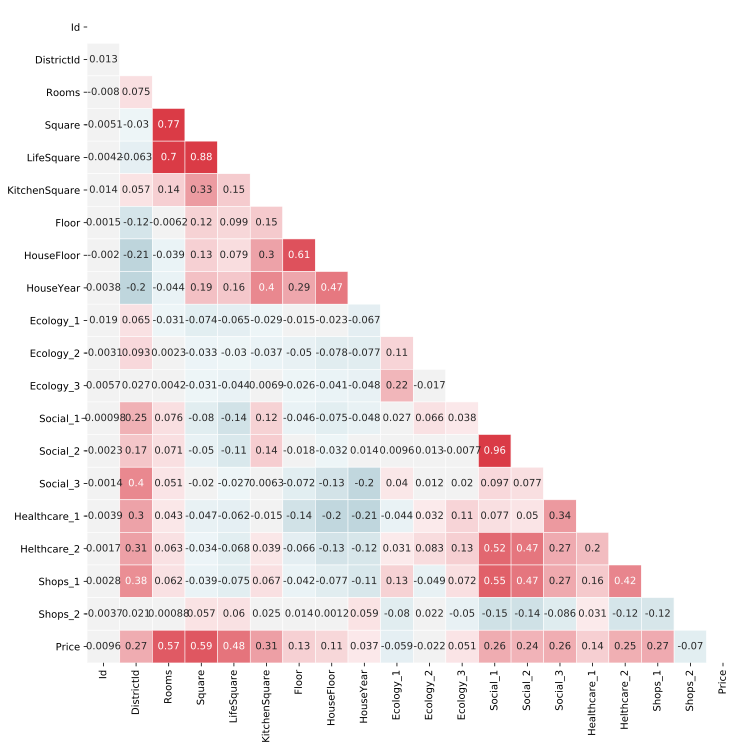

In [2725]:
f, ax = plt.subplots(figsize=(20, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data_cor, mask=mask, cmap=cmap, vmax=.7, center=0,
            square=True, linewidths=.5, cbar= False,annot = True)
plt.show()

In [2726]:
data_cor['Price'].sort_values(ascending = False)

Price            1.000000
Square           0.586152
Rooms            0.573415
LifeSquare       0.476606
KitchenSquare    0.314262
Shops_1          0.270015
DistrictId       0.265691
Social_1         0.263096
Social_3         0.260808
Helthcare_2      0.253043
Social_2         0.238761
Healthcare_1     0.137185
Floor            0.128218
HouseFloor       0.105584
Ecology_3        0.051285
HouseYear        0.037124
Id               0.009566
Ecology_2       -0.022378
Ecology_1       -0.058653
Shops_2         -0.070398
Name: Price, dtype: float64

#### Заменим NAN в признаке 'Healthcare_1' на медианные значения

In [2727]:
data['Healthcare_1'].fillna(data['Healthcare_1'].median(),inplace = True)

#### Создадим датафреймы Х и у. В датафрейм Х добавим все значимые признаки из data

In [2728]:
X = data.drop(['Id','Rooms','LifeSquare','Ecology_2', 'Social_2','Price'], axis = 1)

In [2729]:
X.columns

Index(['DistrictId', 'Square', 'KitchenSquare', 'Floor', 'HouseFloor',
       'HouseYear', 'Ecology_1', 'Ecology_3', 'Social_1', 'Social_3',
       'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2'],
      dtype='object')

In [2730]:
y = data['Price']

####  Разобьем на тренировочный и валидационный датасэты 

In [2731]:
from sklearn.model_selection import train_test_split

In [2732]:
X_valid, X_train, y_valid, y_train = train_test_split(X, y, test_size=0.45, random_state=42)

#### Импортируем RandomForestRegressor и с помощью GridSearchCV подберем параметры

In [2733]:
from sklearn.ensemble import RandomForestRegressor

In [2734]:
#from sklearn.model_selection import GridSearchCV

In [2735]:
#parameters = [{'n_estimators': [1500,2000,2500],
#             'max_features': np.arange(3,6),
#            'max_depth': np.arange(14, 18)}]

In [2736]:
#model = GridSearchCV(estimator=RandomForestRegressor(random_state=100), 
#                param_grid=parameters,
#                scoring='r2',
#                cv=5)

#### Построим модель и обучим ее

In [2737]:
model = RandomForestRegressor(n_estimators = 2000, max_depth = 16, max_features = 5 ,random_state = 100)

In [2738]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=2000, n_jobs=None, oob_score=False,
           random_state=100, verbose=0, warm_start=False)

#### Предскажем значения на тренировочном и валидационном датасэтах

In [2739]:
y_pred = model.predict(X_valid)

In [2740]:
y_pred_train = model.predict(X_train)

#### Импортируем и подсчитаем R^2 и mse

In [2741]:
from sklearn.metrics import r2_score

In [2742]:
r2_score(y_valid,y_pred)

0.7501763533515439

In [2743]:
r2_score(y_train,y_pred_train)

0.9510266526818001

In [2744]:
from sklearn.metrics import mean_absolute_error

In [2745]:
mean_absolute_error(y_valid, y_pred)

27889.121078593394

#### Откроем тестовый датасэт и посмотрим описание

In [2746]:
test = pd.read_csv('input/test.csv')

In [2747]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [2748]:
test.describe()

Id   DistrictId        Rooms       Square   LifeSquare  \
count   5000.000000  5000.000000  5000.000000  5000.000000  3959.000000   
mean    8412.595400    51.279200     1.910000    56.449500    36.158810   
std     4832.674037    44.179466     0.838594    19.092787    17.825287   
min        1.000000     0.000000     0.000000     1.378543     0.333490   
25%     4221.750000    21.000000     1.000000    41.906231    23.092026   
50%     8320.500000    37.000000     2.000000    52.921340    32.925087   
75%    12598.250000    77.000000     2.000000    66.285129    45.174091   
max    16795.000000   212.000000    17.000000   223.453689   303.071094   

       KitchenSquare        Floor   HouseFloor    HouseYear    Ecology_1  \
count    5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean        5.976800     8.632000    12.601000  1984.392600     0.119874   
std         9.950018     5.483228     6.789213    18.573149     0.120070   
min         0.000000     1.000000     0.000000  1908.000000     0.000000   
25%         1.000000     4.000000     9.000000  1973.000000     0.019509   
50%         6.000000     7.000000    12.000000  1977.000000     0.072158   
75%         9.000000    12.000000    17.000000  2000.000000     0.195781   
max       620.000000    78.000000    99.000000  2020.000000     0.521867   

          Social_1      Social_2     Social_3  Healthcare_1  Helthcare_2  \
count  5000.000000   5000.000000  5000.000000   2623.000000   5000.00000   
mean     24.933800   5406.900000     8.262600   1146.657263      1.31940   
std      17.532202   4026.614773    23.863762   1044.744231      1.47994   
min       0.000000    168.000000     0.000000      0.000000      0.00000   
25%       6.000000   1564.000000     0.000000    325.000000      0.00000   
50%      25.000000   5285.000000     2.000000    900.000000      1.00000   
75%      36.000000   7287.000000     5.000000   1548.000000      2.00000   
max      74.000000  19083.000000   141.000000   4849.000000      6.00000   

           Shops_1  
count  5000.000000  
mean      4.242800  
std       4.777365  
min       0.000000  
25%       1.000000  
50%       3.000000  
75%       6.000000  
max      23.000000

#### Так же посмотрим на значения всех признаков,которые будем использовать и заменим  данные как на трейне

In [2749]:
test.loc[(test['Square'] < 15) & (test['LifeSquare'] < 15),:]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
66     9011          53    1.0   1.378543    1.353573            1.0      1   
608   16401          30    1.0   2.645046    4.338755            1.0      2   
837    2138          27    1.0   5.647458    1.501582            1.0      1   
1165  10120           6    1.0   5.100672    3.861780            1.0      3   
3697  15435          21    1.0  13.305531    9.495367            0.0      6   
4490   1165          27    1.0   2.372101    1.899119            1.0      2   
4540   7855           6    1.0   4.967143    2.968086            1.0      3   
4902   1420          45    1.0   1.975769    2.900371            1.0      1   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
66           1.0       1977   0.049637         B         B        34   
608          1.0       1977   0.000078         B         B        22   
837          1.0       1977   0.017647         B         B         2   
1165         1.0       1977   0.243205         B         B         5   
3697         5.0       1965   0.194489         B         B        47   
4490        17.0       1977   0.011654         B         B         4   
4540         1.0       2018   0.243205         B         B         5   
4902         1.0       1977   0.195781         B         B        23   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  
66        7759         0         229.0            1        3       B  
608       6398       141        1046.0            3       23       B  
837        469         0           NaN            0        0       B  
1165      1564         0         540.0            0        0       B  
3697      8004         3         125.0            3        5       B  
4490       915         0           NaN            0        0       B  
4540      1564         0         540.0            0        0       B  
4902      5212         6           NaN            3        2       B

In [2750]:
test.loc[(test['Square'] < 15) & (test['LifeSquare'] < 15),'Square'] = test.loc[test['Rooms'] == 1,'Square'].mean()

In [2751]:
test.loc[(test['Square'] < 15) & (test['LifeSquare'] > 15),:]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
2     5480         190    1.0  13.597819   15.948246           12.0      2   
4713   170           6    2.0   2.900586   61.468563            1.0     18   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
2            5.0       1909   0.000000         B         B        30   
4713        17.0       2014   0.243205         B         B         5   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  
2         7538        87        4702.0            5        5       B  
4713      1564         0         540.0            0        0       B

In [2752]:
test.loc[(test['Square'] < 15) & (test['LifeSquare'] > 15),'Square'] = test['LifeSquare']

In [2753]:
test.loc[test['Square'] > 250,:]

Empty DataFrame
Columns: [Id, DistrictId, Rooms, Square, LifeSquare, KitchenSquare, Floor, HouseFloor, HouseYear, Ecology_1, Ecology_2, Ecology_3, Social_1, Social_2, Social_3, Healthcare_1, Helthcare_2, Shops_1, Shops_2]
Index: []

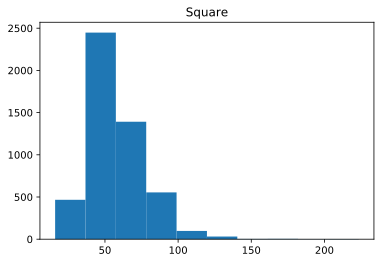

In [2754]:
plt.hist(test['Square'])
plt.title('Square')
plt.show()

С полем 'Square' похоже все в порядке. Переходим к следующему

In [2755]:
test.loc[test['KitchenSquare'] > 233,:]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
1964  14594          11    2.0  42.795304    24.22377          620.0     11   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
1964        14.0       1972   0.038693         B         B        28   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  
1964      6533         1        1015.0            2        5       B

In [2756]:
test.loc[test['KitchenSquare'] > 233,'KitchenSquare'] = test.loc[test['Rooms'] == 2,'KitchenSquare'].mean()

In [2757]:
test.loc[test['KitchenSquare'] > test['LifeSquare'],:]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
1456   5260          73    3.0  69.358242   51.247581           65.0      6   
2424  10662          29    1.0  25.956829   17.251768           33.0      5   
3816  12612          27    2.0  60.988496   33.646726           60.0      5   
3863   3194          29    2.0  43.926987   31.028707           44.0      6   
4281   8015          27    1.0  66.099096   33.639611           62.0      3   
4546   5254         186    2.0  88.618122   25.457811           30.0      5   
4555  12640           6    2.0  54.629142   31.486308           97.0      4   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
1456         6.0       1931   0.042032         B         B        37   
2424         5.0       1973   0.069660         B         B        31   
3816        17.0       2013   0.072158         B         B         2   
3863         5.0       1964   0.086885         B         B        10   
4281         7.0       2016   0.014058         B         B         1   
4546        19.0       1985   0.007659         B         B        35   
4555        17.0       2015   0.243205         B         B         5   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  
1456      6856        84        1940.0            2        5       B  
2424      6119         4           NaN            1        2       B  
3816       629         1           NaN            0        0       A  
3863      2277         2        1547.0            0        0       B  
4281       290         0           NaN            0        0       B  
4546      7077        56        2301.0            3       19       B  
4555      1564         0         540.0            0        0       B

In [2758]:
test.loc[test['KitchenSquare'] > test['LifeSquare'],'KitchenSquare'] = data['KitchenSquare'].median()

In [2759]:
test.loc[test['KitchenSquare'] < 3,:]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
1     15856          74    2.0   69.263183         NaN            1.0      6   
4     14275          27    1.0   47.527111   43.387569            1.0     17   
5      7633          53    1.0   40.675627         NaN            1.0     21   
6     13329          23    2.0   68.099538   64.843025            1.0      2   
11     3310           6    3.0   84.625350         NaN            1.0      6   
14     5214          27    1.0   37.555197         NaN            1.0      5   
18     3495          27    3.0   82.652818    5.690155            1.0      4   
21    16688           1    1.0   44.878767         NaN            1.0      1   
22    12694          27    3.0   83.670032   46.358356            0.0      8   
24     8968          27    2.0   69.849239         NaN            0.0      3   
27    11160          58    1.0   48.610661   48.752502            1.0      4   
30     2982           6    2.0   63.460684         NaN            0.0     13   
32     2449           1    1.0   66.426585         NaN            0.0     14   
38    10704          52    2.0   51.921491         NaN            1.0      6   
43    11513           1    1.0   37.484057   40.593036            0.0      4   
46    12309          45    1.0   42.899569         NaN            0.0     25   
50    14788           6    1.0   38.269173         NaN            1.0      6   
59    10614          27    1.0   44.254995         NaN            1.0      3   
62     3061          30    2.0   66.203290         NaN            1.0     22   
65    10929          48    1.0   40.767892   37.236548            1.0     20   
66     9011          53    1.0   40.943143    1.353573            1.0      1   
70     1872          30    2.0   52.449057   52.798349            1.0     17   
71     9205         120    2.0   85.911827    4.188395            1.0      5   
72     5403          34    4.0   99.112581         NaN            1.0     22   
74     6268           1    1.0   45.885992         NaN            1.0     11   
77     7034          45    2.0   59.927502    3.798341            1.0     23   
78     6553          34    5.0  122.375273    0.333490            0.0      9   
81    12389          27    3.0   99.614906         NaN            1.0     10   
82    14462           6    2.0   61.610642         NaN            1.0     11   
83     8860         167    2.0   71.006730   69.010665            1.0      4   
...     ...         ...    ...         ...         ...            ...    ...   
4913  13309          62    1.0   54.605305   53.427529            0.0     12   
4916   5240          27    3.0   89.218062         NaN            0.0      8   
4919     76          45    2.0   65.466927   63.340061            1.0     22   
4922   2515          23    1.0   49.520325         NaN            1.0      4   
4926  13030           6    2.0   62.179269         NaN            1.0      2   
4927  14686           1    3.0   77.229885   79.958685            1.0     18   
4928  13272          22    3.0   77.214353         NaN            1.0     14   
4937   4803          23    3.0  102.149271         NaN            1.0      6   
4941  15110          58    2.0   67.104108         NaN            1.0      5   
4943  10462           1    1.0   41.237969         NaN            0.0      7   
4945   9405           6    1.0   41.225107         NaN            1.0     25   
4946    511          23    2.0   63.700028         NaN            1.0     17   
4949    343           1    2.0   66.269675         NaN            1.0     11   
4955    286          47    3.0   82.763109         NaN            1.0     15   
4956   7639          27    1.0   38.756507         NaN            1.0      7   
4957  16722           9    1.0   68.794231    5.453158            1.0      4   
4958   9157          58    3.0   94.876277         NaN            0.0      5   
4962   5820          94    1.0   33.680382   34.198977            1.0     10   
4963  116

In [2760]:
test.loc[test['KitchenSquare'] < 3,'KitchenSquare']= data['KitchenSquare'].median()

In [2761]:
test.loc[test['KitchenSquare'] > 20 , :]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
40     5428          27    2.0   62.326044         NaN           61.0     12   
625    2249          62    1.0   77.157675   78.281763           34.0      5   
725    6977         167    3.0  125.693063   65.286558           24.0      7   
803    3747          23    5.0  139.045763   89.790274           42.0      1   
870   13736          27    1.0  141.540215   91.704806           42.0      3   
1447   1968          27    2.0  138.039182   92.484098           42.0      3   
1777   3341          62    3.0  112.114019  112.247841          112.0      3   
2140   4047         168    3.0   92.020293   42.533389           22.0      2   
3723   4483          62    1.0   41.951462   45.672140           41.0     13   
3927   6568          78    1.0   46.827201   40.227011           40.0      5   
4405   5199          27    2.0   59.054990   61.647531           57.0     13   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
40          17.0       1977   0.072158         B         B         2   
625         24.0       2016   0.072158         B         B         2   
725         34.0       2008   0.050272         B         B        21   
803          3.0       2015   0.014073         B         B         2   
870          3.0       2013   0.014073         B         B         2   
1447         3.0       2016   0.014073         B         B         2   
1777         3.0       2017   0.072158         B         B         2   
2140         2.0       2018   0.341072         B         B        27   
3723        17.0       2018   0.072158         B         B         2   
3927        32.0       2007   0.219006         B         B        28   
4405        12.0       2016   0.211401         B         B         9   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  
40         629         1           NaN            0        0       A  
625        629         1           NaN            0        0       A  
725       4231        14        1020.0            0        3       B  
803        475         0           NaN            0        0       B  
870        475         0           NaN            0        0       B  
1447       475         0           NaN            0        0       B  
1777       629         1           NaN            0        0       A  
2140      5664        48        2300.0            3       11       B  
3723       629         1           NaN            0        0       A  
3927      6746         3           NaN            1        4       B  
4405      1892         0           NaN            0        1       B

In [2762]:
test.loc[test['KitchenSquare'] > 20,'KitchenSquare']= test['Square']*\
                                                        (data['KitchenSquare'].median()/data['Square'].median())

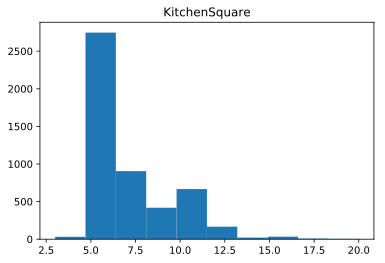

In [2763]:
plt.hist(test['KitchenSquare'])
plt.title('KitchenSquare')
plt.show()

In [2764]:
test.loc[test['HouseFloor'] == 0,:]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
22    12694          27    3.0   83.670032   46.358356            6.0      8   
24     8968          27    2.0   69.849239         NaN            6.0      3   
30     2982           6    2.0   63.460684         NaN            6.0     13   
32     2449           1    1.0   66.426585         NaN            6.0     14   
46    12309          45    1.0   42.899569         NaN            6.0     25   
78     6553          34    5.0  122.375273    0.333490            6.0      9   
113    5032          30    1.0   50.738045         NaN            6.0      5   
120   12743          27    1.0   40.407390         NaN            6.0      9   
130    5746          62    1.0   44.021356         NaN            6.0     13   
132   14834          27    3.0   56.310351         NaN            6.0     19   
211   16515          27    1.0   52.692744         NaN            6.0      8   
285    7234          62    2.0   64.297449         NaN            6.0      8   
320   12041          27    1.0   45.109346   38.510017           11.0     13   
383    5042          58    1.0   47.769551         NaN           12.0     11   
428    2559          23    2.0   73.868460         NaN            6.0      9   
444    3738          45    2.0   61.804781         NaN            6.0     18   
481    8465           1    3.0   76.729191         NaN            6.0     16   
545   12359          27    1.0   46.750549         NaN            6.0     16   
630   15712          27    2.0   59.757302   34.586129            6.0     13   
643     889          27    3.0   86.357546    1.307526            6.0     10   
652    6147          27    1.0   55.739324         NaN            6.0      4   
743   12061          27    2.0   66.055177         NaN            6.0     15   
772     902          27    3.0   99.293191         NaN            6.0      2   
781   12579           6    1.0   41.404390         NaN            6.0     16   
815    9318          27    2.0   61.315839         NaN            6.0      5   
831    2115          62    2.0   74.842678         NaN            6.0     16   
856     683          23    2.0   55.419244         NaN            6.0      2   
875   11296          27    1.0   47.478618   21.946050            6.0      6   
966    1358          78    2.0   54.209252   31.161955            8.0      6   
1016  15989          62    1.0   47.095406         NaN            6.0      4   
...     ...         ...    ...         ...         ...            ...    ...   
3672   1474          74    1.0   48.031878         NaN            6.0      7   
3782   1346          27    3.0   87.190565   85.621397           11.0      7   
3790   8376          74    2.0   73.515949         NaN            6.0      6   
3811  16604          17    3.0  100.000918  102.117015            6.0      4   
3821   6257          62    1.0   43.835919         NaN            6.0      9   
3928  13827          23    1.0   32.002215         NaN            6.0      8   
4074    265          23    4.0   74.817226         NaN            6.0      2   
4082  14160          74    1.0   50.250990         NaN            6.0      5   
4133   5251          62    1.0   52.298122         NaN            6.0      5   
4169   1347          45    2.0   56.227827   56.767757            6.0      4   
4185  13116          27    1.0   47.379905   44.217503            6.0      4   
4189   5946          27    1.0   45.697589         NaN            6.0      3   
4253   1050          23    1.0   56.632521   52.166353            6.0      4   
4279  13225          88    1.0   43.720394         NaN            6.0     18   
4460   9535           1    1.0   48.460912         NaN            6.0     13   
4478   1705          62    2.0   75.820959         NaN            6.0      8   
4501   3237          27    1.0   54.892848         NaN            6.0      7   
4537  14596          27    1.0   40.484688         NaN            6.0      3   
4564    2

In [2765]:
test.loc[test['HouseFloor'] == 0,'HouseFloor'] = test['Floor']

In [2766]:
test.loc[test['HouseFloor'] > 30,:]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
569   12593          31    2.0   84.167303   44.962520      16.000000     17   
651   15864          27    3.0   47.722835   47.098813       9.000000     18   
725    6977         167    3.0  125.693063   65.286558      14.355232      7   
830   15096          30    1.0  132.670513  122.578932       3.000000     10   
1438   1005         124    2.0   74.408979   43.728861       4.000000      8   
1499   7769         124    4.0  189.679576  114.708673       4.000000     19   
1587   5707          76    2.0   73.363523   38.740060       5.000000     38   
1675   3148          31    2.0   86.403315   53.353463      16.000000      5   
2254   4549          31    2.0   80.542640   35.549594      14.000000      5   
2299    956         146    2.0   54.717919   34.481816       9.000000     14   
2946  13916          54    2.0   87.285858   59.122157      18.000000      4   
3024  15188          31    1.0   55.065800   25.212096      10.000000     24   
3576   9906          24    2.0   54.396988   31.789238       8.000000     21   
3585   4533          31    2.0   83.963299   38.419224      14.000000     33   
3711    414          76    2.0   67.609808   41.175948       5.000000     46   
3909   1397          76    3.0  221.138768  118.055342       4.000000     32   
3927   6568          78    1.0   46.827201   40.227011       5.348070      5   
4192  13970           8    1.0   49.806976   45.910825       6.000000     32   
4231  13187          30    1.0   96.146394   81.329808       5.000000     12   
4544   3389          24    2.0   79.624428         NaN      10.000000     28   
4549  16166          31    2.0   88.186012   54.253582      16.000000     31   
4558   7394         148    3.0   79.670857   48.503319       6.000000     18   
4764   2461          72    2.0  103.114357    4.312838       6.000000     34   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
569         40.0       2014   0.151346         B         A        32   
651         99.0       1977   0.072158         B         B         2   
725         34.0       2008   0.050272         B         B        21   
830         39.0       2010   0.000078         B         B        22   
1438        40.0       2015   0.174739         B         B        17   
1499        40.0       2013   0.174739         B         B        17   
1587        48.0       2010   0.000000         B         B         7   
1675        40.0       2015   0.151346         B         A        32   
2254        40.0       2013   0.151346         B         A        32   
2299        37.0       2010   0.236108         B         B        16   
2946        36.0       2011   0.006076         B         B        30   
3024        40.0       2015   0.151346         B         A        32   
3576        40.0       2010   0.111627         B         B        50   
3585        40.0       2014   0.151346         B         A        32   
3711        48.0       2002   0.000000         B         B         7   
3909        48.0       2011   0.000000         B         B         7   
3927        32.0       2007   0.219006         B         B        28   
4192        32.0       2009   0.092291         B         B        21   
4231        39.0       2012   0.000078         B         B        22   
4544        31.0       1977   0.111627         B         B        50   
4549        40.0       2012   0.151346         B         A        32   
4558        33.0       2015   0.313925         B         B        22   
4764        37.0       2015   0.210473         B         B        11   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  
569       5889        10         830.0            4        1       B  
651        629         1           NaN            0        0       A  
725       4231        14        1020.0            0        3       B  
830       6398       141        1046.0            3       23       B  
1438

In [2767]:
test.loc[(test['HouseFloor'] > 30)&(test['Floor']<30),'HouseFloor']= test['Floor']

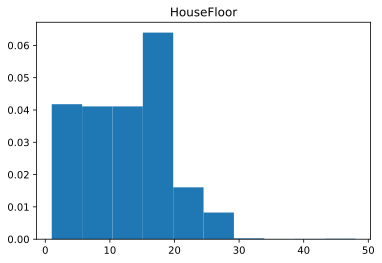

In [2768]:
plt.hist(test['HouseFloor'],density = True)
plt.title('HouseFloor')
plt.show()

In [2769]:
test.loc[(test['HouseFloor'] > 30)&(test['Floor']>30),:]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
1587   5707          76    2.0   73.363523   38.740060            5.0     38   
3585   4533          31    2.0   83.963299   38.419224           14.0     33   
3711    414          76    2.0   67.609808   41.175948            5.0     46   
3909   1397          76    3.0  221.138768  118.055342            4.0     32   
4192  13970           8    1.0   49.806976   45.910825            6.0     32   
4549  16166          31    2.0   88.186012   54.253582           16.0     31   
4764   2461          72    2.0  103.114357    4.312838            6.0     34   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
1587        48.0       2010   0.000000         B         B         7   
3585        40.0       2014   0.151346         B         A        32   
3711        48.0       2002   0.000000         B         B         7   
3909        48.0       2011   0.000000         B         B         7   
4192        32.0       2009   0.092291         B         B        21   
4549        40.0       2012   0.151346         B         A        32   
4764        37.0       2015   0.210473         B         B        11   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  
1587      1660        39        1786.0            1        5       B  
3585      5889        10         830.0            4        1       B  
3711      1660        39        1786.0            1        5       B  
3909      1660        39        1786.0            1        5       B  
4192      4346         2         165.0            1        2       B  
4549      5889        10         830.0            4        1       B  
4764      2398         2        1994.0            3        0       B

In [2770]:
test.loc[(test['Floor'] > test['HouseFloor'])&(test['Floor']< 30),'HouseFloor'] = test ['Floor']

In [2771]:
test.loc[(test['Floor'] > test['HouseFloor'])&(test['Floor']> 30),:] 

Id  DistrictId  Rooms    Square  LifeSquare  KitchenSquare  Floor  \
4698  15759          17    2.0  57.60187   37.744743           10.0     78   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
4698        22.0       1989        0.0         B         B        25   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  
4698      5027         4          46.0            1        1       B

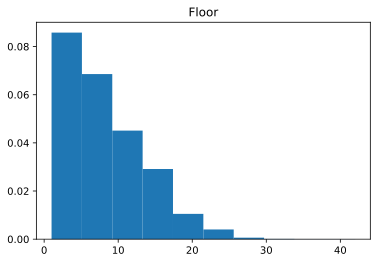

In [2772]:
plt.hist(data['Floor'],density = True)
plt.title('Floor')
plt.show()

In [2773]:
test.loc[test['HouseYear'] > 2020,:]

Empty DataFrame
Columns: [Id, DistrictId, Rooms, Square, LifeSquare, KitchenSquare, Floor, HouseFloor, HouseYear, Ecology_1, Ecology_2, Ecology_3, Social_1, Social_2, Social_3, Healthcare_1, Helthcare_2, Shops_1, Shops_2]
Index: []

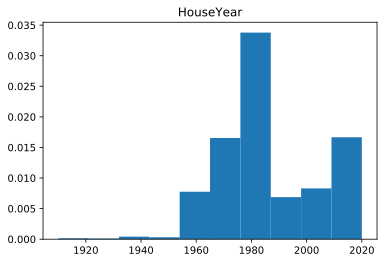

In [2774]:
plt.hist(data['HouseYear'],density = True)
plt.title('HouseYear')
plt.show()

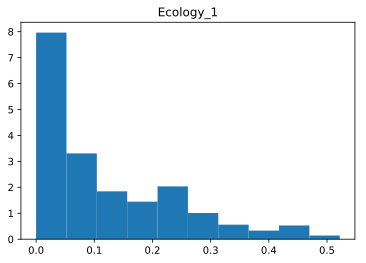

In [2775]:
plt.hist(test['Ecology_1'],density = True)
#plt.scatter(data['Ecology_1'],data['Price'])
plt.title('Ecology_1')
plt.show()

In [2776]:
test.describe()

Id   DistrictId        Rooms       Square   LifeSquare  \
count   5000.000000  5000.000000  5000.000000  5000.000000  3959.000000   
mean    8412.595400    51.279200     1.910000    56.519715    36.158810   
std     4832.674037    44.179466     0.838594    18.973560    17.825287   
min        1.000000     0.000000     0.000000    15.948246     0.333490   
25%     4221.750000    21.000000     1.000000    41.912403    23.092026   
50%     8320.500000    37.000000     2.000000    52.924953    32.925087   
75%    12598.250000    77.000000     2.000000    66.285129    45.174091   
max    16795.000000   212.000000    17.000000   223.453689   303.071094   

       KitchenSquare        Floor   HouseFloor    HouseYear    Ecology_1  \
count    5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean        7.300689     8.632000    13.294800  1984.392600     0.119874   
std         2.142662     5.483228     5.911995    18.573149     0.120070   
min         3.000000     1.000000     1.000000  1908.000000     0.000000   
25%         6.000000     4.000000     9.000000  1973.000000     0.019509   
50%         6.000000     7.000000    14.000000  1977.000000     0.072158   
75%         9.000000    12.000000    17.000000  2000.000000     0.195781   
max        20.000000    78.000000    48.000000  2020.000000     0.521867   

          Social_1      Social_2     Social_3  Healthcare_1  Helthcare_2  \
count  5000.000000   5000.000000  5000.000000   2623.000000   5000.00000   
mean     24.933800   5406.900000     8.262600   1146.657263      1.31940   
std      17.532202   4026.614773    23.863762   1044.744231      1.47994   
min       0.000000    168.000000     0.000000      0.000000      0.00000   
25%       6.000000   1564.000000     0.000000    325.000000      0.00000   
50%      25.000000   5285.000000     2.000000    900.000000      1.00000   
75%      36.000000   7287.000000     5.000000   1548.000000      2.00000   
max      74.000000  19083.000000   141.000000   4849.000000      6.00000   

           Shops_1  
count  5000.000000  
mean      4.242800  
std       4.777365  
min       0.000000  
25%       1.000000  
50%       3.000000  
75%       6.000000  
max      23.000000

In [2777]:
test['Ecology_2'].value_counts()

B    4952
A      48
Name: Ecology_2, dtype: int64

In [2778]:
test['Ecology_2'] = (test['Ecology_2'] == 'A').astype(int)

In [2779]:
test['Ecology_2'].value_counts()

0    4952
1      48
Name: Ecology_2, dtype: int64

In [2780]:
test['Ecology_3'].value_counts()

B    4851
A     149
Name: Ecology_3, dtype: int64

In [2781]:
test['Ecology_3'] = (test['Ecology_3'] == 'A').astype(int)

In [2782]:
test['Ecology_3'].value_counts()

0    4851
1     149
Name: Ecology_3, dtype: int64

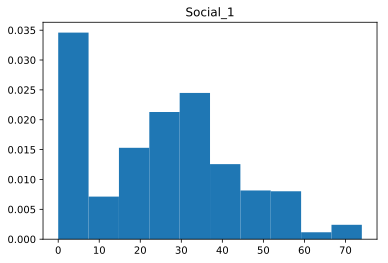

In [2783]:
plt.hist(test['Social_1'],density = True)
plt.title('Social_1')
plt.show()

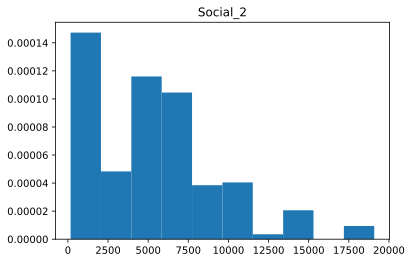

In [2784]:
plt.hist(test['Social_2'],density = True)
plt.title('Social_2')
plt.show()

In [2785]:
test.loc[test['Social_3'] > 100,'Social_3'] = test['Social_3'].median()

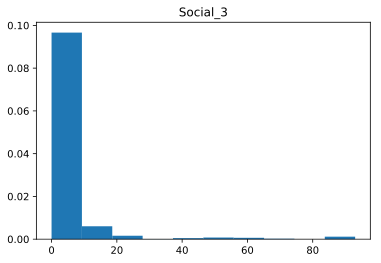

In [2786]:
plt.hist(test['Social_3'],density = True)
plt.title('Social_3')
plt.show()

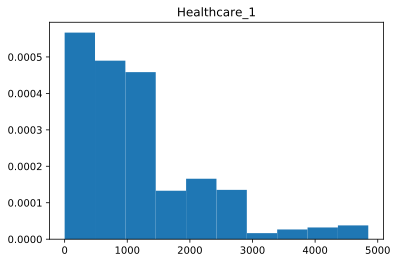

In [2787]:
plt.hist(test['Healthcare_1'],density = True)
plt.title('Healthcare_1')
plt.show()

In [2788]:
test.describe()

Id   DistrictId        Rooms       Square   LifeSquare  \
count   5000.000000  5000.000000  5000.000000  5000.000000  3959.000000   
mean    8412.595400    51.279200     1.910000    56.519715    36.158810   
std     4832.674037    44.179466     0.838594    18.973560    17.825287   
min        1.000000     0.000000     0.000000    15.948246     0.333490   
25%     4221.750000    21.000000     1.000000    41.912403    23.092026   
50%     8320.500000    37.000000     2.000000    52.924953    32.925087   
75%    12598.250000    77.000000     2.000000    66.285129    45.174091   
max    16795.000000   212.000000    17.000000   223.453689   303.071094   

       KitchenSquare        Floor   HouseFloor    HouseYear    Ecology_1  \
count    5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean        7.300689     8.632000    13.294800  1984.392600     0.119874   
std         2.142662     5.483228     5.911995    18.573149     0.120070   
min         3.000000     1.000000     1.000000  1908.000000     0.000000   
25%         6.000000     4.000000     9.000000  1973.000000     0.019509   
50%         6.000000     7.000000    14.000000  1977.000000     0.072158   
75%         9.000000    12.000000    17.000000  2000.000000     0.195781   
max        20.000000    78.000000    48.000000  2020.000000     0.521867   

         Ecology_2    Ecology_3     Social_1      Social_2    Social_3  \
count  5000.000000  5000.000000  5000.000000   5000.000000  5000.00000   
mean      0.009600     0.029800    24.933800   5406.900000     4.92660   
std       0.097518     0.170052    17.532202   4026.614773    11.67663   
min       0.000000     0.000000     0.000000    168.000000     0.00000   
25%       0.000000     0.000000     6.000000   1564.000000     0.00000   
50%       0.000000     0.000000    25.000000   5285.000000     2.00000   
75%       0.000000     0.000000    36.000000   7287.000000     4.00000   
max       1.000000     1.000000    74.000000  19083.000000    93.00000   

       Healthcare_1  Helthcare_2      Shops_1  
count   2623.000000   5000.00000  5000.000000  
mean    1146.657263      1.31940     4.242800  
std     1044.744231      1.47994     4.777365  
min        0.000000      0.00000     0.000000  
25%      325.000000      0.00000     1.000000  
50%      900.000000      1.00000     3.000000  
75%     1548.000000      2.00000     6.000000  
max     4849.000000      6.00000    23.000000

In [2789]:
test['Healthcare_1'].fillna(data['Healthcare_1'].median(),inplace = True)

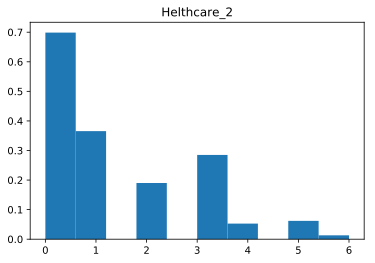

In [2790]:
plt.hist(test['Helthcare_2'],density = True)
plt.title('Helthcare_2')
plt.show()

In [2791]:
test.loc[test['Shops_1'] > 10,'Shops_1']= test['Shops_1'].median()

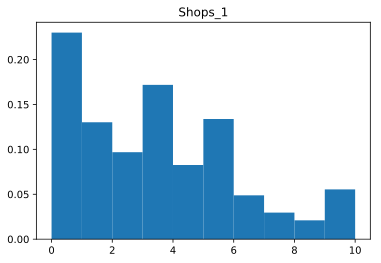

In [2792]:
plt.hist(test['Shops_1'],density = True)
plt.title('Shops_1')
plt.show()

In [2793]:
test['Shops_2'].value_counts()

B    4588
A     412
Name: Shops_2, dtype: int64

In [2794]:
test['Shops_2'] = (test['Shops_2'] == 'A').astype(int)

In [2795]:
test['Shops_2'].value_counts()

0    4588
1     412
Name: Shops_2, dtype: int64

In [2796]:
test.describe()

Id   DistrictId        Rooms       Square   LifeSquare  \
count   5000.000000  5000.000000  5000.000000  5000.000000  3959.000000   
mean    8412.595400    51.279200     1.910000    56.519715    36.158810   
std     4832.674037    44.179466     0.838594    18.973560    17.825287   
min        1.000000     0.000000     0.000000    15.948246     0.333490   
25%     4221.750000    21.000000     1.000000    41.912403    23.092026   
50%     8320.500000    37.000000     2.000000    52.924953    32.925087   
75%    12598.250000    77.000000     2.000000    66.285129    45.174091   
max    16795.000000   212.000000    17.000000   223.453689   303.071094   

       KitchenSquare        Floor   HouseFloor    HouseYear    Ecology_1  \
count    5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean        7.300689     8.632000    13.294800  1984.392600     0.119874   
std         2.142662     5.483228     5.911995    18.573149     0.120070   
min         3.000000     1.000000     1.000000  1908.000000     0.000000   
25%         6.000000     4.000000     9.000000  1973.000000     0.019509   
50%         6.000000     7.000000    14.000000  1977.000000     0.072158   
75%         9.000000    12.000000    17.000000  2000.000000     0.195781   
max        20.000000    78.000000    48.000000  2020.000000     0.521867   

         Ecology_2    Ecology_3     Social_1      Social_2    Social_3  \
count  5000.000000  5000.000000  5000.000000   5000.000000  5000.00000   
mean      0.009600     0.029800    24.933800   5406.900000     4.92660   
std       0.097518     0.170052    17.532202   4026.614773    11.67663   
min       0.000000     0.000000     0.000000    168.000000     0.00000   
25%       0.000000     0.000000     6.000000   1564.000000     0.00000   
50%       0.000000     0.000000    25.000000   5285.000000     2.00000   
75%       0.000000     0.000000    36.000000   7287.000000     4.00000   
max       1.000000     1.000000    74.000000  19083.000000    93.00000   

       Healthcare_1  Helthcare_2     Shops_1      Shops_2  
count   5000.000000   5000.00000  5000.00000  5000.000000  
mean    1029.396400      1.31940     3.02860     0.082400  
std      766.595258      1.47994     2.65375     0.275001  
min        0.000000      0.00000     0.00000     0.000000  
25%      810.000000      0.00000     1.00000     0.000000  
50%      900.000000      1.00000     3.00000     0.000000  
75%      990.000000      2.00000     5.00000     0.000000  
max     4849.000000      6.00000    10.00000     1.000000

In [2797]:
test.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2'],
      dtype='object')

#### Создадим датасэт X_test, добавив в него все признаки из test, которые будет использовать модель

In [2798]:
X_test = test.drop(['Id','Rooms','LifeSquare','Ecology_2', 'Social_2'], axis = 1)

In [2799]:
X_test.head()

DistrictId     Square  KitchenSquare  Floor  HouseFloor  HouseYear  \
0          58  49.882643            6.0      6        14.0       1972   
1          74  69.263183            6.0      6         6.0       1977   
2         190  15.948246           12.0      2         5.0       1909   
3          47  73.046609            9.0     22        22.0       2007   
4          27  47.527111            6.0     17        17.0       2017   

   Ecology_1  Ecology_3  Social_1  Social_3  Healthcare_1  Helthcare_2  \
0   0.310199          0        11       1.0         900.0            0   
1   0.075779          0         6       3.0         900.0            0   
2   0.000000          0        30      87.0        4702.0            5   
3   0.101872          0        23       3.0         900.0            3   
4   0.072158          0         2       1.0         900.0            0   

   Shops_1  Shops_2  
0      0.0        0  
1      2.0        0  
2      5.0        0  
3      3.0        0  
4      0.0        1

In [2800]:
y_test = model.predict(X_test)

In [2801]:
y_test

array([167113.52910139, 223513.13452484, 320177.06005039, ...,
       328624.96645924, 194050.66444945, 184405.30056491])

In [2802]:
test['Price'] = y_test

In [2803]:
test.head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0    725          58    2.0  49.882643   33.432782            6.0      6   
1  15856          74    2.0  69.263183         NaN            6.0      6   
2   5480         190    1.0  15.948246   15.948246           12.0      2   
3  15664          47    2.0  73.046609   51.940842            9.0     22   
4  14275          27    1.0  47.527111   43.387569            6.0     17   

   HouseFloor  HouseYear  Ecology_1  Ecology_2  Ecology_3  Social_1  Social_2  \
0        14.0       1972   0.310199          0          0        11      2748   
1         6.0       1977   0.075779          0          0         6      1437   
2         5.0       1909   0.000000          0          0        30      7538   
3        22.0       2007   0.101872          0          0        23      4583   
4        17.0       2017   0.072158          0          0         2       629   

   Social_3  Healthcare_1  Helthcare_2  Shops_1  Shops_2          Price  
0       1.0         900.0            0      0.0        0  167113.529101  
1       3.0         900.0            0      2.0        0  223513.134525  
2      87.0        4702.0            5      5.0        0  320177.060050  
3       3.0         900.0            3      3.0        0  348054.090346  
4       1.0         900.0            0      0.0        1  146073.060737

In [2804]:
test.loc[:,['Id','Price']].to_csv('output/APerevezentsev_prediction.csv', index = None)